In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pwd

'C:\\Users\\shana\\Projet 6 - Lapage'

# **1. IMPORT DES FICHIERS**

In [2]:
customers = pd.read_csv('customers.csv')
products = pd.read_csv('products.csv')
transactions = pd.read_csv('transactions.csv')

# **2. VERIFICATION ET EXPLORATION DES DONNEES**

## 2.1 FICHIER CUSTOMERS

In [3]:
# On vérifie que l'import a été correctement effectué et si tout semble cohérent
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [4]:
# On vérifie le type de données des colonnes et le nombre de lignes ayant ou non des valeurs nulles
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


- Il y a 8623 lignes et 3 colonnes
- La df customers ne présente pas de valeur manquante 

In [5]:
# On compte le nombre de valeur unique pour la colonne client_id
# La fonction len() renvoie le nombre d'éléments
# La fonction unique() permet de retourner tous les éléments uniques d'une colonne
len(customers['client_id'].unique())

8623

In [6]:
# On vérifie la présence de doublon(s) dans la df
# La méthode duplicated() renvoie une série avec les valeurs 'True' et 'False' qui décrivent les lignes de la df qui sont dupliquées (ou non)
customers[customers.duplicated()]

,client_id,sex,birth


- Pas de doublons
- Client_id peut être clé primaire (8623 lignes et 8623 valeurs uniques)

In [7]:
# On observe la variable 'sex' et les valeurs qu'elle peut prendre
# On nous demande d'analyser les données et de segmenter l'analyse avec cette variable
customers['sex'].unique()

array(['f', 'm'], dtype=object)

La colonne 'sex' présente 2 modalités : f et m pour féminin et masculin

In [8]:
# On cherche à savoir si tous les 'client_id' de la df commencent par 'c_'
# La fonction pandas str.startswith() est une méthode utile pour rechercher et filtrer des données textuelles et ainsi déterminer si le début de cette instance de chaîne correspond à la chaîne spécifiée
#  Le préfixe '.str' ne doit pas être oublié, ça permet de différencier de la fonction python qui n'a pas les mêmes paramètres
customers[~customers['client_id'].str.startswith('c_')]

,client_id,sex,birth
2735,ct_0,f,2001
8494,ct_1,m,2001


Sur toute la df, il y a deux clients qui commencent par 'ct_' et non par 'c_', que faire de ces données ?

In [9]:
# On recherche les incohérences éventuelles qui pourraient fausser notre analyse
# La fonction describe() permet de génèrer des statistiques descriptives qui résument : 
# le nombre total d'objets de la série
# la moyenne
# l'écart type
# la valeur minimum
# le 1er quartile 
# la médiane
# le 3ème quartile
# la valeur maximum
customers['birth'].describe()

count    8623.000000
mean     1978.280877
std        16.919535
min      1929.000000
25%      1966.000000
50%      1979.000000
75%      1992.000000
max      2004.000000
Name: birth, dtype: float64

Les années de naissance des clients semblent cohérentes et sont comprises entre 1929 et 2004.

## 2.2 FICHIER PRODUCTS

In [10]:
# On vérifie que l'import a été correctement effectué et si tout semble cohérent
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [11]:
# On vérifie le type de données des colonnes et le nombre de lignes ayant ou non des valeurs nulles
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


La df products ne présente pas de valeur manquante

In [12]:
# On vérifie la présence de doublon(s) dans la df
# La méthode duplicated() renvoie une série avec les valeurs 'True' et 'False' qui décrivent les lignes de la df qui sont dupliquées (ou non)
products[products.duplicated()]

,id_prod,price,categ


In [13]:
# On compte le nombre de valeur unique pour la colonne id_prod
# La fonction len() renvoie le nombre d'éléments
# La fonction unique() permet de retourner tous les éléments uniques d'une colonne
len(products['id_prod'].unique())

3287

Pas de doublons, id_prod pourra être clé primaire de la df lors de la jointure entre la df products et la df transactions

In [14]:
# On recherche d'éventuelles incohérences concernant les prix
# La fonction describe() permet de génèrer des statistiques descriptives qui résument : 
# le nombre total d'objets de la série
# la moyenne
# l'écart type
# la valeur minimum
# le 1er quartile 
# la médiane
# le 3ème quartile
# la valeur maximum
products['price'].describe()

count    3287.000000
mean       21.856641
std        29.847908
min        -1.000000
25%         6.990000
50%        13.060000
75%        22.990000
max       300.000000
Name: price, dtype: float64

On remarque :
- Une valeur minimum de -1 : un produit en vente ne peut pas avoir un prix nul ou négatif
- Une valeur maximum de 300 : même si ce n'est pas impossible, cela semble élevé pour un livre

In [15]:
# On recherche les produits ayant un prix nul ou négatif
# La fonction .loc permet d'accèder à un groupe de lignes ou de colonnes en renvoyant les valeurs correspondant au 'filtre'

products.loc[products['price'] <=0]

,id_prod,price,categ
731,T_0,-1.0,0


Il n'y a qu'un produit ayant un prix négatif avec 'id_prod' = 'T_0', ce qui semble étrange : les autres valeurs de la colonne semblent commencer par un chiffre.

In [16]:
# On recherche les produits ayant un prix supérieur à 200 euros
# La fonction .loc permet d'accèder à un groupe de lignes ou de colonnes en renvoyant les valeurs correspondant au 'filtre'
products.loc[products['price'] >200]

,id_prod,price,categ
10,2_228,225.17,2
95,2_128,201.74,2
394,2_158,247.22,2
724,2_76,254.44,2
786,2_40,228.11,2
947,2_2,300.00,2
1284,2_211,203.99,2
1436,2_167,236.99,2
1709,2_87,220.99,2
1896,2_4,222.97,2


Il semble avoir plusieurs produits avec un prix supérieur à 200 euros, cela semble élever mais pas impossible : demander si c'est normal.

In [17]:
# On observe la variable 'categ' et les valeurs qu'elle peut prendre
# On nous demande d'analyser les données et de segmenter l'analyse avec cette variable
products['categ'].unique()

array([0, 1, 2], dtype=int64)

On remarque une certaine cohérence entre la référence des produits, la catégorie et le prix :
- Les références produits semblent commencer par le chiffre des catégories

Nous allons le vérifier en créant des df par catégorie

In [18]:
categorie0 = products[products['categ'] == 0]

In [19]:
categorie1 = products[products['categ'] == 1]

In [20]:
categorie2 = products[products['categ'] == 2]

In [21]:
# On cherche à savoir si 'id_prod' de la df commencent par '0_'
# La fonction pandas str.startswith() est une méthode utile pour rechercher et filtrer des données textuelles et ainsi déterminer si le début de cette instance de chaîne correspond à la chaîne spécifiée
#  Le préfixe '.str' ne doit pas être oublié, ça permet de différencier de la fonction python qui n'a pas les mêmes paramètres
categorie0[~categorie0['id_prod'].str.startswith('0_')]

,id_prod,price,categ
731,T_0,-1.0,0


In [22]:
# On cherche à savoir si 'id_prod' de la df commencent par '1_'
# La fonction pandas str.startswith() est une méthode utile pour rechercher et filtrer des données textuelles et ainsi déterminer si le début de cette instance de chaîne correspond à la chaîne spécifiée
#  Le préfixe '.str' ne doit pas être oublié, ça permet de différencier de la fonction python qui n'a pas les mêmes paramètres
categorie1[~categorie1['id_prod'].str.startswith('1_')]

,id_prod,price,categ


In [23]:
# On cherche à savoir si 'id_prod' de la df commencent par '2_'
# La fonction pandas str.startswith() est une méthode utile pour rechercher et filtrer des données textuelles et ainsi déterminer si le début de cette instance de chaîne correspond à la chaîne spécifiée
#  Le préfixe '.str' ne doit pas être oublié, ça permet de différencier de la fonction python qui n'a pas les mêmes paramètres
categorie2[~categorie2['id_prod'].str.startswith('2_')]

,id_prod,price,categ


Hormis, le 'T_0' qui semble être une valeur aberrante, notre hypothèse était correcte.

Nous remarquons une certaine corrélation entre les prix et les catégories.

In [24]:
# On recherche les incohérences éventuelles qui pourraient fausser notre analyse
# La fonction describe() permet de génèrer des statistiques descriptives qui résument : 
# le nombre total d'objets de la série
# la moyenne
# l'écart type
# la valeur minimum
# le 1er quartile 
# la médiane
# le 3ème quartile
# la valeur maximum
categorie0.describe()

,price,categ
count,2309.000000,2309.0
mean,11.727280,0.0
std,7.568756,0.0
min,-1.000000,0.0
25%,5.580000,0.0
50%,10.320000,0.0
75%,16.650000,0.0
max,40.990000,0.0


In [25]:
# On recherche les incohérences éventuelles qui pourraient fausser notre analyse
# La fonction describe() permet de génèrer des statistiques descriptives qui résument : 
# le nombre total d'objets de la série
# la moyenne
# l'écart type
# la valeur minimum
# le 1er quartile 
# la médiane
# le 3ème quartile
# la valeur maximum
categorie1.describe()

,price,categ
count,739.000000,739.0
mean,25.531421,1.0
std,15.425162,0.0
min,2.000000,1.0
25%,13.390000,1.0
50%,22.990000,1.0
75%,33.990000,1.0
max,80.990000,1.0


In [26]:
# On recherche les incohérences éventuelles qui pourraient fausser notre analyse
# La fonction describe() permet de génèrer des statistiques descriptives qui résument : 
# le nombre total d'objets de la série
# la moyenne
# l'écart type
# la valeur minimum
# le 1er quartile 
# la médiane
# le 3ème quartile
# la valeur maximum
categorie2.describe()

,price,categ
count,239.000000,239.0
mean,108.354686,2.0
std,49.561431,0.0
min,30.990000,2.0
25%,71.065000,2.0
50%,101.990000,2.0
75%,136.530000,2.0
max,300.000000,2.0


**Constat** : 

Il semble en effet que les catégories soient inhérentes aux tranches de prix.


On remarque prix catégorie 0 < prix catégorie 1 < prix catégorie 2

## 2.3 FICHIER TRANSACTIONS

In [27]:
# On vérifie que l'import a été correctement effectué et si tout semble cohérent
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


La df contient 679 532 tuples et 4 colonnes

In [28]:
# On vérifie le type de données des colonnes et le nombre de lignes ayant ou non des valeurs nulles
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


- La df transactions ne présente pas de valeur manquante (679 532 non_null pour toutes les colonnes)
- Toutes les colonnes contiennent des valeurs de type 'object'
- La colonne date devra être de type date pour pouvoir par la suite effectuer les analyses concernant l'évolution des valeurs dans le temps


In [29]:
# La méthode duplicated() renvoie une série avec les valeurs 'True' et 'False' qui décrivent les lignes de la df qui sont dupliquées (ou non)
# On va chercher les doublons
transactions[transactions.duplicated()]

,id_prod,date,session_id,client_id
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
139339,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [30]:
# On crée une df avec les doublons
transactions_dupli = transactions[transactions.duplicated()]
len(transactions_dupli)

126

In [31]:
# On cherche à connaitre les valeurs de la colonne 'client_id'
# La fonction unique() permet de retourner tous les éléments uniques d'une colonne
transactions_dupli['client_id'].unique()

array(['ct_1', 'ct_0'], dtype=object)

- La df présente 126 doublons
- On remarque que les doublons ont tous  les mêmes valeurs id_client : 'ct_0' et 'ct_1'
- On remarque que les doublons semblent tous avoir la même valeur id_prod 'T_0' 
- On remarque que les doublons semblent tous contenir l'information 'test'
- On peut faire le lien avec les valeurs incohérentes trouvées dans les df customers et products et en déduire qu'il s'agit de données test.
- Il faut vérifier notre déduction pour savoir comment traiter nos données

In [32]:
# On va chercher les lignes pour lesquelles la valeur de 'id_prod est 'T_0'
# La fonction .loc permet d'accèder à un groupe de lignes ou de colonnes en renvoyant les valeurs correspondant au 'filtre'
transactions.loc[transactions['id_prod'] == 'T_0']

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [33]:
# On crée une nouvelle df pour pouvoir vérifier notre hypothèse sans impacter les données originales 
df_test=transactions[transactions['id_prod'] == 'T_0']
df_test

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [34]:
# On cherche à savoir si toutes les dates de la df commencent par 'test'
# La fonction pandas str.startswith() est une méthode utile pour rechercher et filtrer des données textuelles et ainsi déterminer si le début de cette instance de chaîne correspond à la chaîne spécifiée
#  Le préfixe '.str' ne doit pas être oublié, ça permet de différencier de la fonction python qui n'a pas les mêmes paramètres
df_test[df_test['date'].str.startswith('test')]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


Nous avons 200 lignes, ce qui signifie, que toutes les données avec 'id_prod'= 'T_0' sont bien des données test


In [35]:
# On cherche à savoir si les données ct_1 et ct_0 correspondent bien à des clients tests
# La fonction unique() permet de retourner tous les éléments uniques d'une colonne
df_test['client_id'].unique()

array(['ct_0', 'ct_1'], dtype=object)

Les valeurs de la colonne 'client_id', confirme qu'il s'agit de clients tests.
Il faudra donc les supprimer lors du nettoyage des données.

In [36]:
# On recherche d'éventuelles incohérences dans la colonne "id_prod" 
# La fonction len() renvoie le nombre d'élément(s)
# La fonction unique() permet de retourner tous les éléments uniques d'une colonne
len(transactions['id_prod'].unique())

3267

Il y a 3267 valeurs uniques dans la colonne 'id_prod' dans la df transactions et 3287 dans la df products, il n'y a pas plus de produits vendus que de produits en catalogue.

In [37]:
# On recherche d'éventuelles incohérences dans la colonne "client_id" 
# La fonction len() renvoie le nombre d'élément(s)
# La fonction unique() permet de retourner tous les éléments uniques d'une colonne
len(transactions['client_id'].unique())

8602

Il y a 8602 valeurs uniques dans la colonne 'client_id' dans la df transactions et 8623 dans la df customers, il n'y a pas plus de clients qui ont passé commande que de clients dans la base de données clients.

In [38]:
# On cherche le nombre de valeurs uniques de 'session_id' dans la df
# La fonction len() renvoie le nombre d'élément(s)
# La fonction unique() permet de retourner tous les éléments uniques d'une colonne
len(transactions['session_id'].unique())

342316

Il n'y a que 342 316 valeurs uniques sur 679 532 lignes de la df, cela ne semble pas forcément incohérent mais on va par la suite chercher à comprendre les données.

In [39]:
# On cherche à comprendre comment est organisée la df
# La méthode duplicated() renvoie une série avec les valeurs 'True' et 'False' qui décrivent les lignes de la df qui sont dupliquées (ou non)
transactions[transactions['session_id'].duplicated()]

,id_prod,date,session_id,client_id
306,0_2192,2023-01-26 22:43:25.496864,s_332881,c_3682
375,1_379,2022-04-18 23:06:13.048219,s_196083,c_2132
832,0_30,2022-09-22 22:49:05.168711,s_272055,c_5636
1586,0_1431,2022-05-07 13:20:48.611570,s_204977,c_5782
1598,0_1417,2022-09-20 09:22:29.265383,s_270779,c_2117
...,...,...,...,...
679523,1_190,2022-01-30 06:17:15.265379,s_157285,c_656
679525,0_1434,2022-12-14 13:18:29.143723,s_311959,c_3653
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [40]:
# Exploration des données
# La fonction .loc permet d'accèder à un groupe de lignes ou de colonnes en renvoyant les valeurs correspondant au 'filtre'
transactions.loc[transactions['session_id'] == 's_332881']

,id_prod,date,session_id,client_id
135,1_370,2023-01-26 22:58:11.537792,s_332881,c_3682
306,0_2192,2023-01-26 22:43:25.496864,s_332881,c_3682
207135,0_1512,2023-01-26 23:03:44.078579,s_332881,c_3682
279630,0_1521,2023-01-26 23:01:07.725702,s_332881,c_3682
643702,0_1113,2023-01-26 23:06:44.258213,s_332881,c_3682


In [41]:
# Exploration des données
# La fonction .loc permet d'accèder à un groupe de lignes ou de colonnes en renvoyant les valeurs correspondant au 'filtre'
transactions.loc[transactions['session_id'] == 's_196083']

,id_prod,date,session_id,client_id
113,1_451,2022-04-18 23:19:24.224849,s_196083,c_2132
375,1_379,2022-04-18 23:06:13.048219,s_196083,c_2132
149556,2_101,2022-04-18 23:27:39.050232,s_196083,c_2132


In [42]:
# Exploration des données
# La fonction .loc permet d'accèder à un groupe de lignes ou de colonnes en renvoyant les valeurs correspondant au 'filtre'
transactions.loc[transactions['session_id'] == 's_63204']

,id_prod,date,session_id,client_id
535844,1_277,2021-07-16 20:09:21.085288,s_63204,c_2227
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [43]:
# Exploration des données
# La fonction .loc permet d'accèder à un groupe de lignes ou de colonnes en renvoyant les valeurs correspondant au 'filtre'
transactions[~transactions['session_id'].duplicated()]

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679522,1_328,2023-01-22 22:16:26.075669,s_330818,c_5173
679524,0_1572,2021-10-08 07:55:52.347300,s_101701,c_725
679526,1_425,2022-03-18 21:34:28.596252,s_181088,c_5533
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489


In [44]:
# Exploration des données
# La fonction .loc permet d'accèder à un groupe de lignes ou de colonnes en renvoyant les valeurs correspondant au 'filtre'
transactions.loc[transactions['session_id'] == 's_330818']

,id_prod,date,session_id,client_id
679522,1_328,2023-01-22 22:16:26.075669,s_330818,c_5173


On en conclut que dans la df transactions, un tuple correspond à une session.

# **3. NETTOYAGE DES DONNES**

## 3.1 CUSTOMERS

Pour rappel :
- Nous avions deux clients tests à supprimer de la df 

Pour faciliter la lecture et les analyses par la suite, nous allons créer une nouvelle df avec les âges plutôt qu'avec les dates de naissance. 

In [45]:
# On supprime les clients tests de la df
customers.drop([2735, 8494], inplace = True)

In [46]:
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [47]:
# On cherche à savoir si certains  'client_id' de la df ne commencent pas par 'c_'
# La fonction pandas str.startswith() est une méthode utile pour rechercher et filtrer des données textuelles et ainsi déterminer si le début de cette instance de chaîne correspond à la chaîne spécifi
customers[~customers['client_id'].str.startswith('c_')]

,client_id,sex,birth


In [48]:
#  On ajoute une colonne âge pour faciliter la lecture et aussi pour l'analyse par la suite
customers['age'] = 2022 - customers['birth']
customers

,client_id,sex,birth,age
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79
...,...,...,...,...
8618,c_7920,m,1956,66
8619,c_7403,f,1970,52
8620,c_5119,m,1974,48
8621,c_5643,f,1968,54


## 3.2 PRODUCTS

In [49]:
# On supprime le produit 731 (index) qui correspond à un test et non à un client réel
products.drop(731, inplace = True)

In [50]:
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [51]:
# On vérifie qu'il n'y ait plus de produits tests
products[products['id_prod'] == 'T_0']

,id_prod,price,categ


## 3.3 TRANSACTIONS

In [52]:
# On cherche à savoir s'il reste des transactions tests
# La fonction .loc permet d'accèder à un groupe de lignes ou de colonnes en renvoyant les valeurs correspondant au 'filtre'
transactions.drop(transactions.loc[transactions['id_prod']=='T_0'].index, inplace=True)

In [53]:
transactions[transactions['id_prod'] == 'T_0']

,id_prod,date,session_id,client_id


In [54]:
# On cherche à savoir s'il reste des clients tests
transactions[transactions['client_id'] == 'ct_0']

,id_prod,date,session_id,client_id


In [55]:
transactions[transactions['client_id'] == 'ct_1']

,id_prod,date,session_id,client_id


In [56]:
# On vérifie le type de données des colonnes et le nombre de lignes ayant ou non des valeurs nulles
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679332 non-null  object
 1   date        679332 non-null  object
 2   session_id  679332 non-null  object
 3   client_id   679332 non-null  object
dtypes: object(4)
memory usage: 25.9+ MB


In [57]:
# On remarque que les données de la colonne date sont de formes object à la place de date, on va donc changer le type de données
# La fonction to_datetime permet de convertir les données de la colonne en date
transactions['date'] = pd.to_datetime(transactions['date'])

In [58]:
# On vérifie le type de données des colonnes et le nombre de lignes ayant ou non des valeurs nulles
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


## 3.4 JOINTURES

In [59]:
# On crée une df à partir d'une jointure entre transactions et products avec comme clé primaire 'id_prod'
# La fonction merge permet d'effectuer une jointure(fusion) entre 2 df
transa_prod = pd.merge(transactions, products, how='left', on='id_prod')
transa_prod

,id_prod,date,session_id,client_id,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0
...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0


In [60]:
# On vérifie le type de données des colonnes et le nombre de lignes ayant ou non des valeurs nulles
transa_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   price       679111 non-null  float64       
 5   categ       679111 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 36.3+ MB


In [61]:
# On crée une df à partir d'une jointure entre transa_prod et customers avec comme clé primaire 'client_id'
## Cette df doit nous permettre d'éffectuer par la suite les analyses
# La fonction merge permet d'effectuer une jointure(fusion) entre 2 df
df_finale = pd.merge(transa_prod, customers, how='inner', on='client_id')
df_finale

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,36
1,0_1627,2022-06-18 05:55:31.816994,s_225494,c_103,3.99,0.0,f,1986,36
2,0_1104,2023-02-08 17:31:06.898425,s_338755,c_103,13.21,0.0,f,1986,36
3,0_1390,2021-04-20 06:18:39.939761,s_23078,c_103,19.37,0.0,f,1986,36
4,0_1547,2022-03-15 19:54:53.904123,s_179629,c_103,8.99,0.0,f,1986,36
...,...,...,...,...,...,...,...,...,...
679327,0_1509,2021-05-15 08:17:35.835342,s_34762,c_8114,4.99,0.0,m,1962,60
679328,1_152,2021-11-08 17:12:27.637349,s_116675,c_240,11.06,1.0,m,1998,24
679329,2_207,2021-06-01 04:31:16.088314,s_42418,c_305,50.99,2.0,f,1996,26
679330,1_521,2022-10-18 00:38:49.629165,s_284060,c_305,22.99,1.0,f,1996,26


In [62]:
# On vérifie la cohérence afin de s'assurer que la clé primaire et que le type de jointure ne cause pas de perte de données
# On regarde le CA
# La fonction sum() renvoie la somme des valeurs de l'axe demandé 
transa_prod['price'].sum()

11853728.68

In [63]:
# On vérifie la cohérence afin de s'assurer que la clé primaire et que le type de jointure ne cause pas de perte de données
# On regarde le CA
# La fonction sum() renvoie la somme des valeurs de l'axe demandé 
df_finale['price'].sum()

11853728.68

On remarque un changement d'ordre entre la df transa_prod et df_finale, ainsi qu'un regroupement par client (plus ou moins logique vu que nous avons choisi la clé primaire client_id). On va alors chercher à savoir si les données ont changé ou non.

In [64]:
# On vérifie la cohérence afin de s'assurer que la clé primaire et que le type de jointure ne cause pas de perte de données
# On regarde le nombre de 
# La fonction len() renvoie le nombre d'élément
# La fonction unique() permet de retourner tous les éléments uniques d'une colonne
len(transa_prod['client_id'].unique())

8600

In [65]:
# On vérifie la cohérence afin de s'assurer que la clé primaire et que le type de jointure ne cause pas de perte de données
# On regarde le nombre de 
# La fonction len() renvoie le nombre d'élément
# La fonction unique() permet de retourner tous les éléments uniques d'une colonne
len(df_finale['client_id'].unique())

8600

In [66]:
# On vérifie la cohérence afin de s'assurer que la clé primaire et que le type de jointure ne cause pas de perte de données
# On regarde le nombre de 
# La fonction len() renvoie le nombre d'élément
# La fonction unique() permet de retourner tous les éléments uniques d'une colonne
len(transactions['client_id'].unique())

8600

Il y a bien le même nombre de clients dans toutes les df

In [67]:
# On vérifie le type de données des colonnes et le nombre de lignes ayant ou non des valeurs nulles
df_finale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   price       679111 non-null  float64       
 5   categ       679111 non-null  float64       
 6   sex         679332 non-null  object        
 7   birth       679332 non-null  int64         
 8   age         679332 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 51.8+ MB


On remarque que dans les colonnes 'price' et 'categ' il y a des valeurs manquantes.
Nous allons chercher à comprendre d'où cela provient et comment les traiter.

In [68]:
# Nous allons créer une df avec uniquement les valeurs manquantes afin de pouvoir vérfiier les données sans impacter la df
# Le '&' permet de rajouter une condition
df_nan = df_finale[(df_finale['price'].isnull()) & (df_finale['categ'].isnull())]
df_nan

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
893,0_2245,2021-04-22 04:57:20.090378,s_23987,c_6714,NaN,NaN,f,1968,54
2001,0_2245,2021-06-05 17:04:43.982913,s_44481,c_6714,NaN,NaN,f,1968,54
2359,0_2245,2022-04-05 17:04:43.982913,s_189669,c_6714,NaN,NaN,f,1968,54
6798,0_2245,2022-05-05 17:04:43.982913,s_204093,c_6714,NaN,NaN,f,1968,54
7368,0_2245,2022-12-05 17:04:43.982913,s_307520,c_6714,NaN,NaN,f,1968,54
...,...,...,...,...,...,...,...,...,...
632394,0_2245,2021-10-19 09:32:03.667461,s_107022,c_6128,NaN,NaN,m,1986,36
648744,0_2245,2021-11-12 09:25:22.905886,s_118458,c_7416,NaN,NaN,m,1933,89
672600,0_2245,2021-08-22 08:51:27.564509,s_79102,c_6752,NaN,NaN,m,1987,35
672671,0_2245,2022-04-22 08:51:27.564509,s_197669,c_6752,NaN,NaN,m,1987,35


On remarque que toutes les données manquantes semblent correspondre à un seul produit '0_2245', nous allons vérfiier notre supposition.

In [69]:
# La fonction unique() permet de retourner tous les éléments uniques d'une colonne
df_nan['id_prod'].unique()

array(['0_2245'], dtype=object)

Le résultat de la commande confirme que les NaN sont uniquement liés au produit '0_2245'.
Dans la réalité, nous pourrions demander directement aux collaborateurs concernés de quel produit il s'agit, et faire le traitement adéquat. 
Mais n'ayant pas accès à ce recours qui nous simplifierais la tache, nous allons continuer notre exploration pour comprendre.


In [70]:
# Nous vérifions si les NaN correspondent bien à des NaN à la valeur '0' de 'categ'
((df_finale['categ']==2).sum())+(df_finale['categ']==0).sum()+(df_finale['categ']==1).sum()+221

679332

Il s'agit bien de valeurs manquantes.
Le plus probable est qu'il s'agisse d'un oubli dans la df products, nous allons vérifier.

In [71]:
# On cherche si le produit '0_2245' est dans la df (products) correspondant aux produits
# La fonction .loc permet d'accèder à un groupe de lignes ou de colonnes en renvoyant les valeurs correspondant au 'filtre'
products.loc[products['id_prod'] =='0_2245']

,id_prod,price,categ


Le produits '0_2245' est effectivement absent de la df

In [72]:
# On cherche à savoir si l'absence de données liées aux produits 0_2245 va impacter notre analyse et dans quelle mesure.
# La fonction len() renvoie le nombre d'élément
len(df_nan)/len(df_finale)*100


0.03253195786449041

Le produit '0_2245' ne représente que 0.03 % des ventes, nous pourrions les supprimer sans impacter de manière significative l'analyse.

Toutefois, certains points de l'analyse ciblée sont portés sur les catégories et les prix, il serait dommage d'évincer les ventes sans avoir chercher avant.

Comme nous l'avions observé les produits ont un premier chiffre qui est lié à leur catégorie, le produit '0_2245' est donc supposé appartenir à la catégorie 0.

Nous avons vu également qu'il y avait une corrélation entre les prix et les catégories, nous pourrions par exemple pour rester le plus neutre possible, imputer au produit le prix moyen de la catégorie 0.

**Traitement des données manquantes :**

- Nous pouvons supprimmer les données manquantes
- Nous pouvons faire une imputation afin de remplacer les données manquantes par une valeur

Toutefois, il faut pouvoir justifier la supression et l'imputation afin que ça ne fausse pas l'analyse.
Nous allons donc les mettre de coté et continuer l'analyse sans.

In [73]:
# On supprime tous les tuples de la df concernant le produit 0_2245
df_finale.drop( df_finale[ df_finale['id_prod'] == '0_2245' ].index, inplace=True)
df_finale

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,36
1,0_1627,2022-06-18 05:55:31.816994,s_225494,c_103,3.99,0.0,f,1986,36
2,0_1104,2023-02-08 17:31:06.898425,s_338755,c_103,13.21,0.0,f,1986,36
3,0_1390,2021-04-20 06:18:39.939761,s_23078,c_103,19.37,0.0,f,1986,36
4,0_1547,2022-03-15 19:54:53.904123,s_179629,c_103,8.99,0.0,f,1986,36
...,...,...,...,...,...,...,...,...,...
679327,0_1509,2021-05-15 08:17:35.835342,s_34762,c_8114,4.99,0.0,m,1962,60
679328,1_152,2021-11-08 17:12:27.637349,s_116675,c_240,11.06,1.0,m,1998,24
679329,2_207,2021-06-01 04:31:16.088314,s_42418,c_305,50.99,2.0,f,1996,26
679330,1_521,2022-10-18 00:38:49.629165,s_284060,c_305,22.99,1.0,f,1996,26


In [74]:
# La fonction isna() permet de détécter les valeurs manquantes
# La fonction sum() permet de faire la somme de la liste des objets booléens obtenus grâce à la fonction isna()
df_finale.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
price         0
categ         0
sex           0
birth         0
age           0
dtype: int64

In [75]:
# On veut que les données de la colonne catégorie soient de type int  on utilise la fonction astype pour convertir les données
df_finale['categ'] = df_finale['categ'].astype(int)
df_finale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679331
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679111 non-null  object        
 1   date        679111 non-null  datetime64[ns]
 2   session_id  679111 non-null  object        
 3   client_id   679111 non-null  object        
 4   price       679111 non-null  float64       
 5   categ       679111 non-null  int32         
 6   sex         679111 non-null  object        
 7   birth       679111 non-null  int64         
 8   age         679111 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(4)
memory usage: 49.2+ MB


# **4. ANALYSE**

## 4.1 ZOOM SUR LE CA 

####   CA total

In [76]:
# Nous cherchons à connaitre le CA total 
# La fonction sum() permet de faire la somme de la liste des objets booléens 
df_finale['price'].sum()

11853728.68

Le CA total est de 11 853 728.68 €

In [77]:
df_2021 = df_finale.loc[df_finale['date'].dt.strftime('%Y') == '2021']
ca2021 = df_2021 ['price'].sum()
ca2021

4770826.5600000005

Le CA 2021 est de 4 770 826.56 €

In [78]:
df_2022 = df_finale.loc[df_finale['date'].dt.strftime('%Y') == '2022']
ca2022 = df_2022 ['price'].sum()
ca2022

6108681.8100000005

Le CA 2022 est de 6 108 681.81 €

Une analyse du CA annuel concernant l'évolution ne serait pas spécialement pertinente puisqu'en 2021 les données commencent en mars (absence de données ou début d'activité ?)

#### Nombre de ventes

In [79]:
# la méthode count permet de connaitre le nombre de fois que la valeur apparait, ici nous n'avons pas spécifié de conditions, la méthode va compter tous les éléments de la DF
df_finale['session_id'].count()

679111

Il y a eu 679 111 ventes au total

In [80]:
11853728.68/679111

17.454773490637024

In [81]:
vte21=df_2021['session_id'].count()
vte21

278248

In [82]:
vte22=df_2022['session_id'].count()
vte22

346380

Nous pouvons compter 278 248 ventes en 2021 et 346380 en 2022.

#### Evolution du CA en fonction du temps

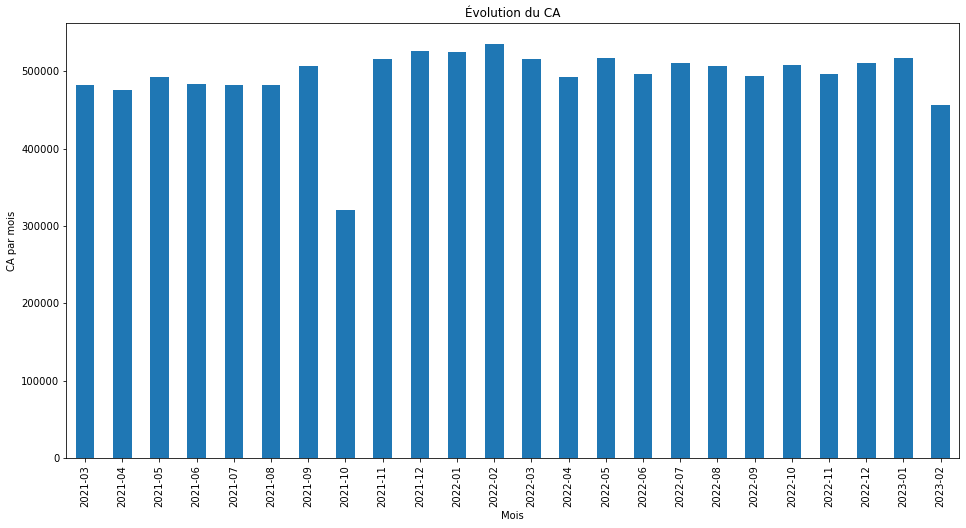

In [83]:
# Nous cherchons à mettre en évidence le CA mensuel
# Nous utilisons ici le module matplotlib de la librairie pyplot pour faire un graphique de type diagramme en barre
# Nous utlisions '.dt.strftime('%Y-%m')' afin de pouvoir modéliser les données 'mensuellement'

fig, axs = plt.subplots(figsize=(16, 8))
df_finale.groupby(df_finale['date'].dt.strftime('%Y-%m'))['price'].sum().plot(kind='bar')
plt.xlabel('Mois')
plt.ylabel('CA par mois')
plt.title('Évolution du CA')
plt.xticks(rotation=90)
plt.show()


#### Evolution du CA en fonction du temps et moyenne mobile

In [84]:
# Nous créons une nouvelle df avec seulement les dates et les ventes
# Il aurait été plus simple de créer la df en ne sélectionnant que les colonnes qui nous intérressent plutot que supprimer celles qui nous intéresse pas
df_ca = df_finale.drop(columns =['categ','birth','age','session_id','client_id','id_prod','sex'])
df_ca

,date,price
0,2022-05-20 13:21:29.043970,4.18
1,2022-06-18 05:55:31.816994,3.99
2,2023-02-08 17:31:06.898425,13.21
3,2021-04-20 06:18:39.939761,19.37
4,2022-03-15 19:54:53.904123,8.99
...,...,...
679327,2021-05-15 08:17:35.835342,4.99
679328,2021-11-08 17:12:27.637349,11.06
679329,2021-06-01 04:31:16.088314,50.99
679330,2022-10-18 00:38:49.629165,22.99


In [85]:
df_ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679331
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    679111 non-null  datetime64[ns]
 1   price   679111 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.5 MB


In [86]:
df_monthly = df_ca.groupby(pd.Grouper(key='date', freq='M')).sum()
df_monthly

,price
date,
2021-03-31,482440.61
2021-04-30,476109.30
2021-05-31,492943.47
2021-06-30,484088.56
2021-07-31,482835.40
2021-08-31,482284.79
2021-09-30,507240.68
2021-10-31,320798.74
2021-11-30,516167.73


In [87]:
# Nous cherchons à calculer la moyenne mobile
#La fonction Python Pandas DataFrame.rolling() fournit une fenêtre déroulante pour les opérations mathématiques.
# La fonction mean permet de calculer la moyenne
# Nous avons choisi 3 pour le parametre window, puisque généralement on fait des bilans soit mensuels, soit trimestriels, soit annuels.
df_monthly['moyennemobile']= df_monthly.rolling(window=3).mean()
df_monthly

,price,moyennemobile
date,,
2021-03-31,482440.61,NaN
2021-04-30,476109.30,NaN
2021-05-31,492943.47,483831.126667
2021-06-30,484088.56,484380.443333
2021-07-31,482835.40,486622.476667
2021-08-31,482284.79,483069.583333
2021-09-30,507240.68,490786.956667
2021-10-31,320798.74,436774.736667
2021-11-30,516167.73,448069.050000


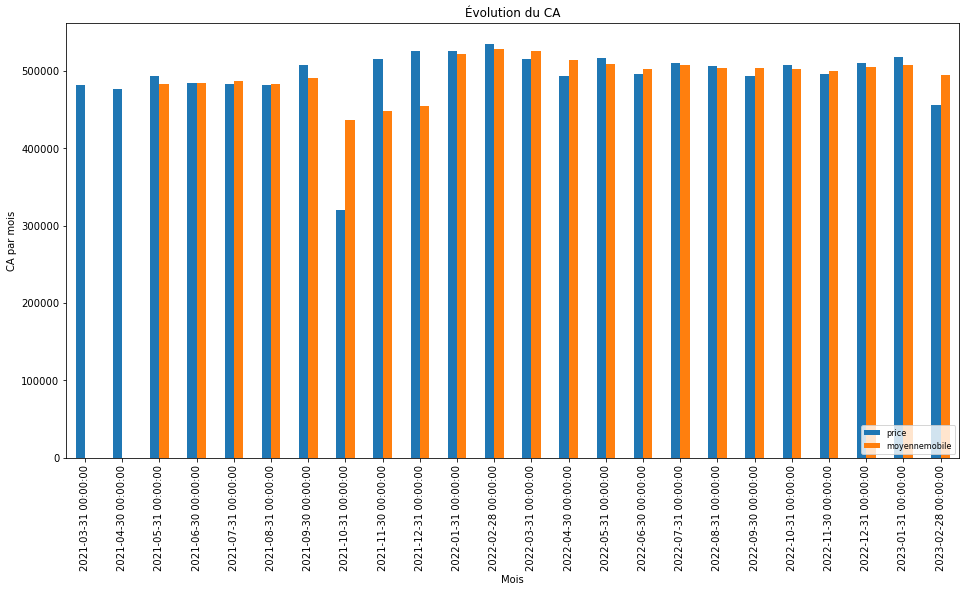

In [191]:
# Nous cherchons à comparer moyenne mobile et CA
# Nous utilisons ici le module matplotlib de la librairie pyplot pour faire un graphique de type diagramme en barre
# Nous utlisions '.dt.strftime('%Y-%m')' afin de pouvoir modéliser les données 'mensuellement'

df_monthly.plot(kind='bar',figsize=(16, 8))


plt.xlabel('Mois')
plt.ylabel('CA par mois')
plt.title('Évolution du CA')
plt.legend(loc='lower right', fontsize=8)
plt.xticks(rotation=90)
plt.show()


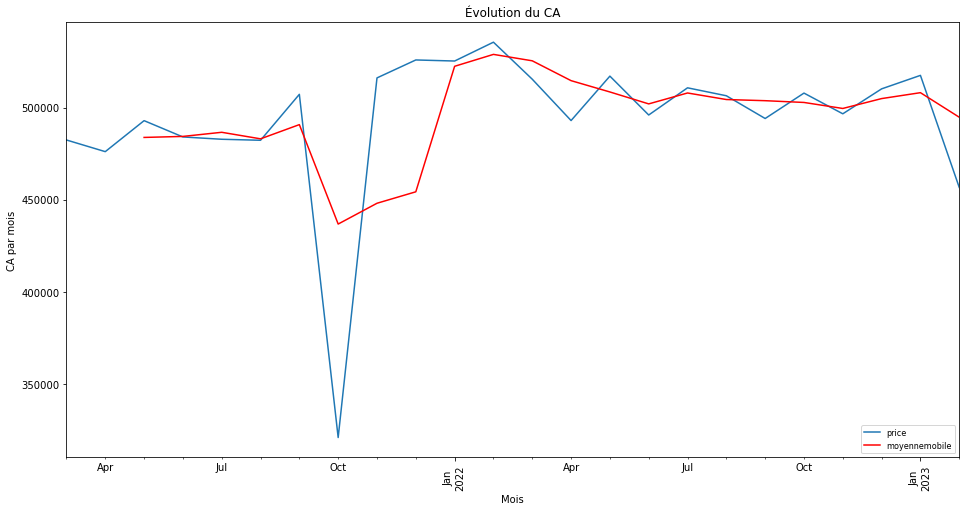

In [89]:
fig, axs = plt.subplots(figsize=(16, 8))
df_monthly['price'].plot(kind='line')
df_monthly['moyennemobile'].plot(kind='line', color = 'red')
plt.xlabel('Mois')
plt.ylabel('CA par mois')
plt.title('Évolution du CA')
plt.legend(loc='lower right', fontsize=8)
plt.xticks(rotation=90)
plt.show()

On remarque une baisse drastique du CA sur le mois d'octobre 2021, nous allons chercher à comprendre cette baisse.


La moyenne mobile (simple dans ce cas) est utile pour évaluer la tendance de la courbe. 
En finance c'est un indicateur très utilisé, et le croisement entre moyenne mobile et cours signale un changement de tendance.

Limite de cet outil :
- Le choix de la période (il n'est pas évident de choisir la période la plus adaptée)
- Le retard des moyennes mobiles à période longue (on peut avoir un décalage avec la réalité)
- Seule la période couverte par la moyenne est prise en compte (3 mois dans notre cas)
- L'absence de pondération : chaque unité de la période a le même poids, sachant qu'une entreprise évolue dans un environnement changeant et incertai, ainsi il serait peut-être  plus pertinent d'accroitre l'importance (le poids) des données aux périodes les plus récentes.
- Les faux signaux 


#### Zoom sur le mois d'octobre 2021

In [90]:
# On crée une nouvelle df qui ne contient que les ventes du mois d'octobre 2021

vte_octobre21 = df_finale.loc[df_finale['date'].dt.strftime('%Y-%m') == '2021-10'].reset_index(drop=True)
vte_octobre21

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
0,0_1403,2021-10-19 22:45:29.086913,s_107276,c_103,15.99,0,f,1986,36
1,0_1638,2021-10-23 12:01:41.346917,s_108948,c_103,5.46,0,f,1986,36
2,0_2086,2021-10-06 18:25:23.139339,s_100965,c_103,3.61,0,f,1986,36
3,0_1489,2021-10-29 01:53:15.834861,s_111579,c_103,10.99,0,f,1986,36
4,0_1322,2021-10-19 23:28:09.714692,s_107276,c_103,4.33,0,f,1986,36
...,...,...,...,...,...,...,...,...,...
21594,2_120,2021-10-21 16:20:40.350739,s_108100,c_597,42.19,2,m,2004,18
21595,1_542,2021-10-31 05:48:23.014967,s_112597,c_593,19.47,1,m,1958,64
21596,2_79,2021-10-14 20:22:05.166156,s_104811,c_1069,55.99,2,f,1998,24
21597,2_112,2021-10-20 07:27:42.196086,s_107459,c_4436,67.57,2,f,1993,29


In [91]:
# On vérifie le type de données des colonnes et le nombre de lignes ayant ou non des valeurs nulles
vte_octobre21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21599 entries, 0 to 21598
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id_prod     21599 non-null  object        
 1   date        21599 non-null  datetime64[ns]
 2   session_id  21599 non-null  object        
 3   client_id   21599 non-null  object        
 4   price       21599 non-null  float64       
 5   categ       21599 non-null  int32         
 6   sex         21599 non-null  object        
 7   birth       21599 non-null  int64         
 8   age         21599 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(4)
memory usage: 1.4+ MB


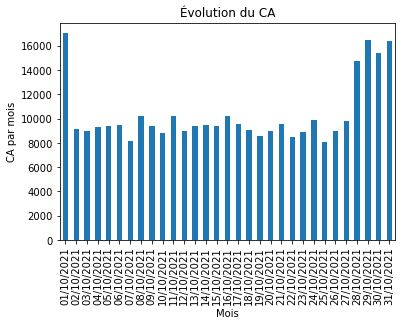

In [92]:
# On cherche à comprendre les données du mois d'octobre
# On cherche à mettre en évidence le CA par jour
# On va donc grouper les infos par jour en faisant en un group by
# Nous utilisons ici le module matplotlib de la librairie pyplot pour faire un graphique de type diagramme en barre
vte_octobre21.groupby(vte_octobre21['date'].dt.strftime('%d/%m/%Y'))['price'].sum().plot(kind='bar')
plt.xlabel('Mois')
plt.ylabel('CA par mois')
plt.title('Évolution du CA')
plt.xticks(rotation=90)
plt.show()


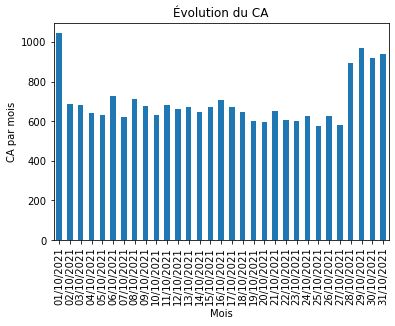

In [93]:
# On cherche à comprendre les données du mois d'octobre
# On cherche à mettre en évidence le nombre de ventes par jour
# On va donc grouper les infos par jour en faisant en un group by
# Nous utilisons ici le module matplotlib de la librairie pyplot pour faire un graphique de type diagramme en barre
vte_octobre21.groupby(vte_octobre21['date'].dt.strftime('%d/%m/%Y'))['session_id'].count().plot(kind='bar')
plt.xlabel('Mois')
plt.ylabel('CA par mois')
plt.title('Évolution du CA')
plt.xticks(rotation=90)
plt.show()


On remarque une baisse significative du CA et du nombre de ventes du 2 octobre 2021 au 27 octobre 2021.

Avant d'émettre une hypothèse nous allons continuer l'exploration des données en se penchant sur les catégories.

In [94]:
# On crée des df de ventes par catégorie sans restriction temporelle
df_ventes_c0 = df_finale[(df_finale["categ"] == 0)]
df_ventes_c1 = df_finale[(df_finale["categ"] == 1)]
df_ventes_c2 = df_finale[(df_finale["categ"] == 2)]

In [95]:
# On crée des df de ventes par catégorie pour le mois d'octobre 2021 uniquement
vte_octobre21_c0 = vte_octobre21[(vte_octobre21["categ"] == 0)]
vte_octobre21_c1 = vte_octobre21[(vte_octobre21["categ"] == 1)]
vte_octobre21_c2 = vte_octobre21[(vte_octobre21["categ"] == 2)]

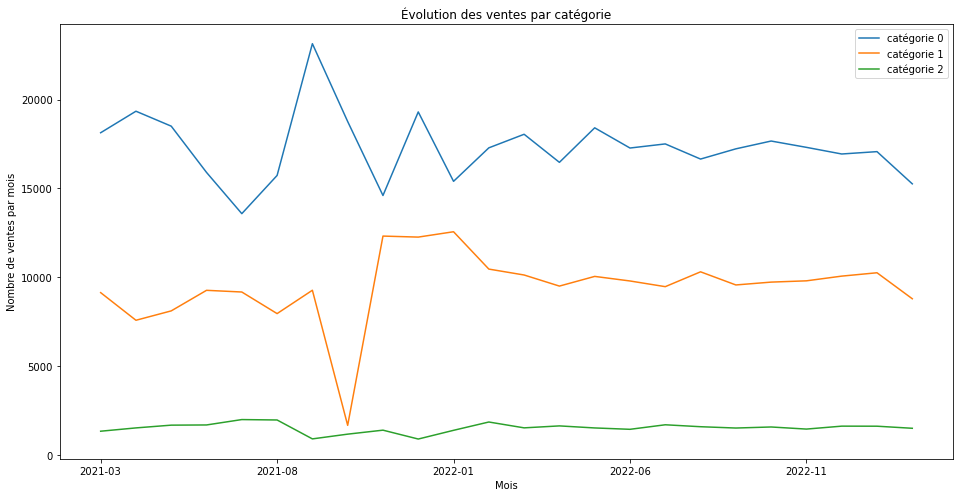

In [96]:
# On cherche à comprendre la baisse du CA du mois d'octobre 2021
# On cherche à observer l'évolution des ventes par catégories 
fig, axs = plt.subplots(figsize=(16, 8))
df_ventes_c0.groupby(df_ca['date'].dt.strftime('%Y-%m'))['session_id'].count().plot(kind='line', label = 'catégorie 0')
df_ventes_c1.groupby(df_ca['date'].dt.strftime('%Y-%m'))['session_id'].count().plot(kind='line',label = 'catégorie 1')
df_ventes_c2.groupby(df_ca['date'].dt.strftime('%Y-%m'))['session_id'].count().plot(kind='line', label = 'catégorie 2')
plt.xlabel('Mois')
plt.ylabel('Nombre de ventes par mois')
plt.title('Évolution des ventes par catégorie')
plt.legend(loc='best')
plt.show()

On remarque une baisse des ventes de la catégorie 1 au mois d'octobre 2021, la baisse significative du CA serait-elle liée à cette baisse de ventes de categorie 1 ?

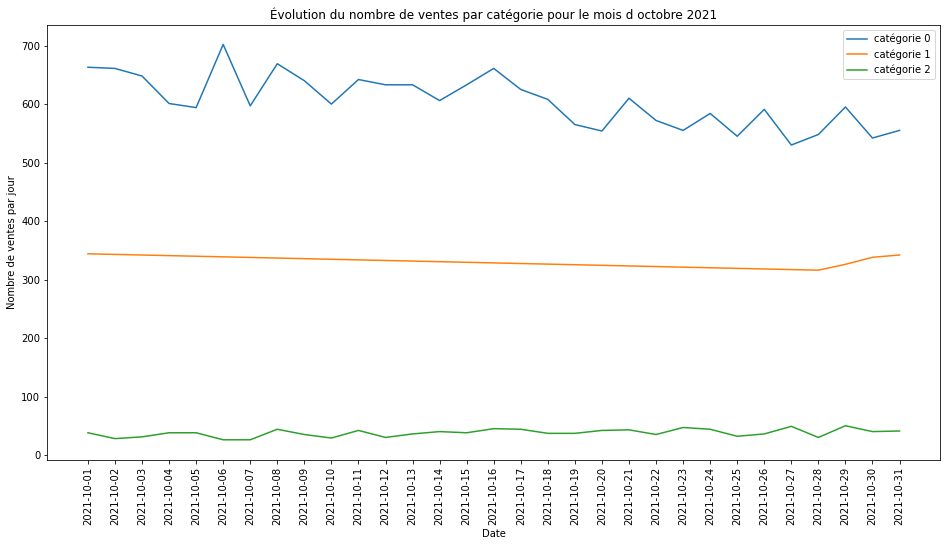

In [97]:
fig, axs = plt.subplots(figsize=(16, 8))
plt.plot(vte_octobre21_c0.groupby(vte_octobre21['date'].dt.strftime('%Y-%m-%d'))['session_id'].count(), label='catégorie 0')
plt.plot(vte_octobre21_c1.groupby(vte_octobre21['date'].dt.strftime('%Y-%m-%d'))['session_id'].count(), label='catégorie 1')
plt.plot(vte_octobre21_c2.groupby(vte_octobre21['date'].dt.strftime('%Y-%m-%d'))['session_id'].count(), label='catégorie 2')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Nombre de ventes par jour')
plt.title('Évolution du nombre de ventes par catégorie pour le mois d octobre 2021')
plt.legend(loc='best')
plt.show()

Nous remarquons que pour la catégorie 1, la courbe ne semble pas refleter une situation 'normale'.


In [98]:
# On a remarqué que l'anomalie, ou du moins ce qui semble l'être, était accentuée entre le 2 et le 27 octobre 2021
# Nous allons regarder de plus près les données sur cette période
# Nous allons créer une nouvelle df
zoom_octobre = vte_octobre21.loc[(vte_octobre21['date'].dt.strftime('%Y-%m-%d') > '2021-10-01') & (vte_octobre21['date'].dt.strftime('%Y-%m-%d') <= '2021-10-27')]
zoom_octobre

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
0,0_1403,2021-10-19 22:45:29.086913,s_107276,c_103,15.99,0,f,1986,36
1,0_1638,2021-10-23 12:01:41.346917,s_108948,c_103,5.46,0,f,1986,36
2,0_2086,2021-10-06 18:25:23.139339,s_100965,c_103,3.61,0,f,1986,36
4,0_1322,2021-10-19 23:28:09.714692,s_107276,c_103,4.33,0,f,1986,36
5,0_1453,2021-10-06 18:34:39.902464,s_100965,c_103,7.99,0,f,1986,36
...,...,...,...,...,...,...,...,...,...
21593,0_1260,2021-10-03 02:57:14.393248,s_99202,c_6925,10.35,0,f,1992,30
21594,2_120,2021-10-21 16:20:40.350739,s_108100,c_597,42.19,2,m,2004,18
21596,2_79,2021-10-14 20:22:05.166156,s_104811,c_1069,55.99,2,f,1998,24
21597,2_112,2021-10-20 07:27:42.196086,s_107459,c_4436,67.57,2,f,1993,29


In [99]:
# On regroupe les ventes par catégories
zoom_octobre.groupby('categ').count()

,id_prod,date,session_id,client_id,price,sex,birth,age
categ,,,,,,,,
0,15859,15859,15859,15859,15859,15859,15859,15859
2,972,972,972,972,972,972,972,972


Il n'y a pas de vente de catégorie 1 du 02 octobre 2021 au 27 octobre 2021.
S'agit-il d'un problème de remontées de données, d'une rupture de stock ou même si beaucoup moins probable, que les clients n'aient pas acheté de livres de la catégorie 1durant la période selectionnée ?

## 4.2 PROFIL DES CLIENTS

### 4.2.1 Profil des clients

#### CA par client

In [100]:
# Nous cherchons à connâitre le CA par client
# Nous créeons une nouvelle df
df_clients_ca = df_finale.groupby('client_id').sum()
df_clients_ca = df_clients_ca.drop(columns =['categ','birth','age'])
df_clients_ca

,price
client_id,
c_1,558.18
c_10,1353.60
c_100,254.85
c_1000,2261.89
c_1001,1812.86
...,...
c_995,189.41
c_996,1625.58
c_997,1490.01


In [101]:
# On cherche à connaître les plus gros clients
# La fonction .sort_values() permet de trier la liste par ordre décroissant ici
# Le tri est fait en fonction du CA ('price')
df_clients_ca.sort_values('price', ascending = False).head(10)

,price
client_id,
c_1609,324033.35
c_4958,289760.34
c_6714,153598.92
c_3454,113637.93
c_3263,5276.87
c_1570,5271.62
c_2899,5214.05
c_2140,5208.82
c_7319,5155.77


Nous remarquons 4 très gros clients, nous pouvons supposer raisonnablement qu'il s'agit de revendeurs et non de client particulier.

In [102]:
# On cherche à connaître les petits gros clients
# La fonction .sort_values() permet de trier la liste par ordre croissant ici
# Le tri est fait en fonction du CA ('price')
df_clients_ca.sort_values('price', ascending = True ).head(10)

,price
client_id,
c_8351,6.31
c_8140,8.30
c_8114,9.98
c_240,11.06
c_4648,11.20
c_4478,13.36
c_5962,13.99
c_6040,15.72
c_5919,15.98


In [103]:
# La fonction describe() permet de génèrer des statistiques descriptives qui résument : 
# le nombre total d'objets de la série
# la moyenne
# l'écart type
# la valeur minimum
# le 1er quartile 
# la médiane
# le 3ème quartile
# la valeur maximum
df_clients_ca.describe()

,price
count,8600.000000
mean,1378.340544
std,5182.542488
min,6.310000
25%,547.630000
50%,1027.020000
75%,1779.500000
max,324033.350000


Nous remarquons que la valeur du CA maximum est très éloignée de la moyenne ou même du 3 ème quartile, il s'agit donc d'outliers que nous allons chercher à identifier.

**Qu'est-ce une valeur aberrante ?**

Une valeur aberrante ou outlier est une valeur extrême qui diffère amplement des autres valeurs de la même variable.

**Pourquoi est-il important de les identifier ?**

L'identification et le traitement des valeurs aberrantes constitue une étape essentielle dans l'analyse de données. En effet, les outliers peuvent fausser les conclusion de l'analyse et la rendre de ce fait impertinente. 

 **Comment détecter les valeurs aberrantes ?**
 
 Il existe de nombreuses méthodes selon le type de données, ici nous utiliserons la méthode de la "boite à moustache" et du calcul lié aux quartiles qui semble être la manière la plus simple et la plus appropriée d'identfier nos outliers.


#### CA et outliers

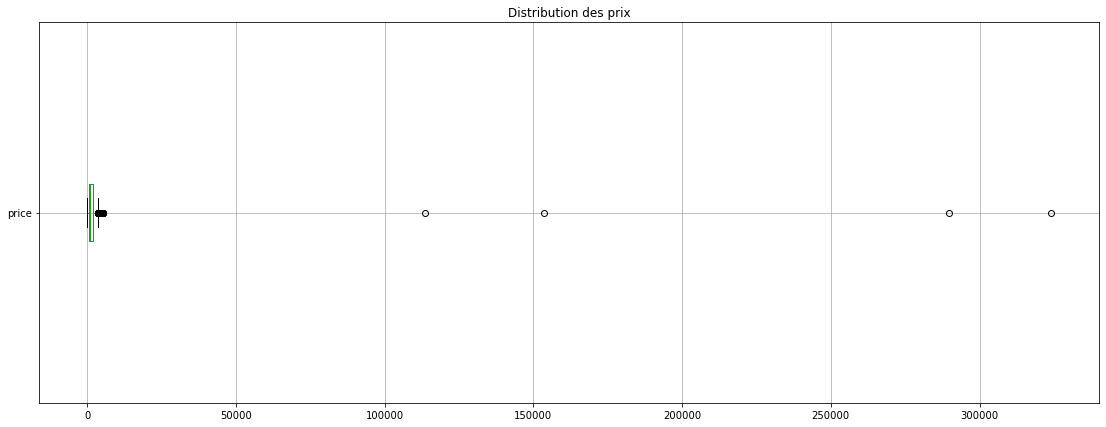

In [104]:
plt.figure(figsize=(19, 7))
df_clients_ca.boxplot(column='price', vert=False)
plt.title("Distribution des prix")
plt.show()

In [105]:
# On va recalculer les quartiles et intequartiles pour avoir des données précises
# On va utiliser la librairie numpy
# Ici minIQ et maxIQ sont calculés de la même façon que pour la boite à moustache ci-dessus
# On utilise le print pour vérifier les valeurs et les comparer avec .describe()
Q1 = round(np.quantile(df_clients_ca['price'], 0.25),2)
print('Q1:\n', Q1)
Q3 = round(np.quantile(df_clients_ca['price'], 0.75),2)
print('Q3:\n', Q3)
IQ = Q3 - Q1
print('IQ:\n', IQ)
minIQ = round((Q1-1.5*IQ),2)
print('minIQ:\n', minIQ)
maxIQ = Q3+1.5*IQ
print('maxIQ:\n', maxIQ)

Q1:
 547.63
Q3:
 1779.5
IQ:
 1231.87
minIQ:
 -1300.17
maxIQ:
 3627.305


In [106]:
# On va créer une nouvelle df contenant les outliers max à partir de la df_finale
# La fonction .sort_values() permet de trier la liste
# Ici le tri est fait par prix   by='price'
outliers_max = df_clients_ca[(df_clients_ca['price'] > maxIQ)]
outliers_max.sort_values(by='price',ascending = False )

,price
client_id,
c_1609,324033.35
c_4958,289760.34
c_6714,153598.92
c_3454,113637.93
c_3263,5276.87
...,...
c_4101,3638.13
c_4557,3636.35
c_6182,3634.58


In [107]:
# On va créer une nouvelle df contenant les outliers min à partir de la df_finale
outliers_min = df_clients_ca[(df_clients_ca['price'] < minIQ)]
outliers_min

,price
client_id,


In [108]:
outliers= df_finale[(df_finale['client_id'] == 'c_1609') | (df_finale['client_id'] == 'c_4958') | (
    df_finale['client_id'] == 'c_6714') | (df_finale['client_id'] == 'c_3454')]
outliers

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
442,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0,f,1968,54
443,1_661,2022-09-13 10:18:02.746197,s_267366,c_6714,22.99,1,f,1968,54
444,0_1340,2021-10-13 16:03:24.117055,s_104247,c_6714,14.76,0,f,1968,54
445,1_446,2022-02-04 14:53:30.833353,s_159894,c_6714,23.92,1,f,1968,54
446,1_445,2022-08-24 05:38:17.574112,s_257657,c_6714,23.99,1,f,1968,54
...,...,...,...,...,...,...,...,...,...
65579,0_1810,2023-01-26 13:50:58.578116,s_332688,c_3454,5.96,0,m,1969,53
65580,1_277,2022-07-25 04:51:13.350122,s_243399,c_3454,25.99,1,m,1969,53
65581,1_442,2022-01-25 20:40:55.096312,s_155151,c_3454,24.98,1,m,1969,53
65582,0_1586,2022-03-11 14:21:30.970320,s_177655,c_3454,12.71,0,m,1969,53


**Comment traiter les valeurs aberrantes ?**

Les observations extrêmes ne sont pas forcément incorrectes. Il est important de prendre en compte et comprendre le contexte de l'analyse. Il faut se poser les bonnes questions avant d'effectuer tout traitement :

 - La valeur est-elle plausible ou complétement fantaisiste ?
 
Les outliers identifiés se trouvent dans une fourchette de prix très élevées par rapport aux reste de la clientèle. Toutefois ce n'est pas incohérent, puisqu'en supposant que ce soit des revendeurs, il est normal d'acheter en grosse quantité.

 - Dans quelle(s) mesure(s) la valeur impacte-t-elle mon analyse ?
 
La présence d'outliers pourrait principalement fausser l'analyse concernant le CA et surtout le profil des clients.

 - Est-ce une erreur de saisie ou une erreur dans la collecte d'informations ?
 
Nous ne disposons pas des informations nécessaires pour répondre à cette question, toutefois il est possible de demander à quelqu'un de faire la vérification en interne.

 - Devons nous supprimer,remplacer ou garder la valeur ?
 
Nous devons vérfiier dans un premier temps, que les prix sont les bons. Le cas échéant, nous n'avons pas de traitement à effectuer.
S'il s'agit bien de clients réels, et non d'une erreur de donner, nous devons garder les valeurs mais les écarter de notre analyse. Pour cela, nous continuerons l'analyse à partir d'une nouvelle df excluant les 'gros' clients.

In [109]:
# On crée une nouvelle df en supprimant les outliers
df_finale2 = df_finale.drop(outliers.index).reset_index(drop=True)
df_finale2

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0,f,1986,36
1,0_1627,2022-06-18 05:55:31.816994,s_225494,c_103,3.99,0,f,1986,36
2,0_1104,2023-02-08 17:31:06.898425,s_338755,c_103,13.21,0,f,1986,36
3,0_1390,2021-04-20 06:18:39.939761,s_23078,c_103,19.37,0,f,1986,36
4,0_1547,2022-03-15 19:54:53.904123,s_179629,c_103,8.99,0,f,1986,36
...,...,...,...,...,...,...,...,...,...
632472,0_1509,2021-05-15 08:17:35.835342,s_34762,c_8114,4.99,0,m,1962,60
632473,1_152,2021-11-08 17:12:27.637349,s_116675,c_240,11.06,1,m,1998,24
632474,2_207,2021-06-01 04:31:16.088314,s_42418,c_305,50.99,2,f,1996,26
632475,1_521,2022-10-18 00:38:49.629165,s_284060,c_305,22.99,1,f,1996,26


In [110]:
# On crée une nouvelle df en ne gardant que les clients particuliers, leurs id et le CA par client
df_clt_particulier = df_finale2.groupby('client_id').sum()
df_clt_particulier = df_clt_particulier .drop(columns =['categ','birth','age'])
df_clt_particulier 

,price
client_id,
c_1,558.18
c_10,1353.60
c_100,254.85
c_1000,2261.89
c_1001,1812.86
...,...
c_995,189.41
c_996,1625.58
c_997,1490.01


In [111]:
# La fonction describe() permet de génèrer des statistiques descriptives qui résument : 
# le nombre total d'objets de la série
# la moyenne
# l'écart type
# la valeur minimum
# le 1er quartile 
# la médiane
# le 3ème quartile
# la valeur maximum
df_clt_particulier.describe()

,price
count,8596.000000
mean,1276.488848
std,954.182275
min,6.310000
25%,547.290000
50%,1026.845000
75%,1778.317500
max,5276.870000


#### Courbe de Lorenz

La courbe de Lorenz est un outil qui permet de représenter graphiquement une dispersion, plus la courbe est éloignée de la diagonale de référence, plus la répartition des revenus est inégalitaire.

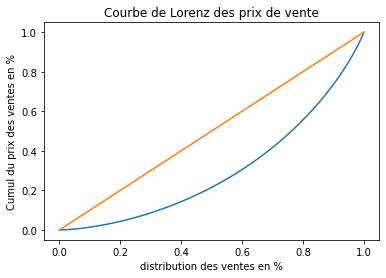

In [112]:
# On s'intéresse à la répartition du CA entre les clients
# Pour cela nous utiliserons une courbe de Lorenz 

lorenzprixclient = df_finale2.groupby('client_id')['price'].sum().values

n = len(lorenzprixclient)

lorenz = np.cumsum(np.sort(lorenzprixclient)) / lorenzprixclient.sum()                        

lorenz = np.append([0],lorenz)                                                                                              

 

xaxis = np.linspace(0-1/n,1+1/n,n+1)                                                                                      
plt.plot(xaxis,lorenz,drawstyle='steps-post')

plt.plot([0,1],[0,1])

plt.xlabel('distribution des ventes en %')

plt.ylabel('Cumul du prix des ventes en %')

plt.title ('Courbe de Lorenz des prix de vente')

plt.show()

La courbe de Lorenz permet de calculer l’indice de Gini. 

C'est une mesure du degré d’inégalité.

L’indice de Gini correspond au lien entre la surface compris entre la courbe et la diagonale.

L’indice de Gini varie entre 0 et 1.

Plus la courbe se rapproche de 1 plus l'inégalité est forte.

In [113]:
# Calcul de l'indice de Gini

AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/lorenz.size
S = 0.5 - AUC
gini = 2*S
gini

0.4026863528899416

Interprétation de la courbe de Lorenz :
- La courbe s'éloigne moyennement

Interpretation de l'indice de Gini :
- L'indice de Gini est de 0.40

<AxesSubplot:>

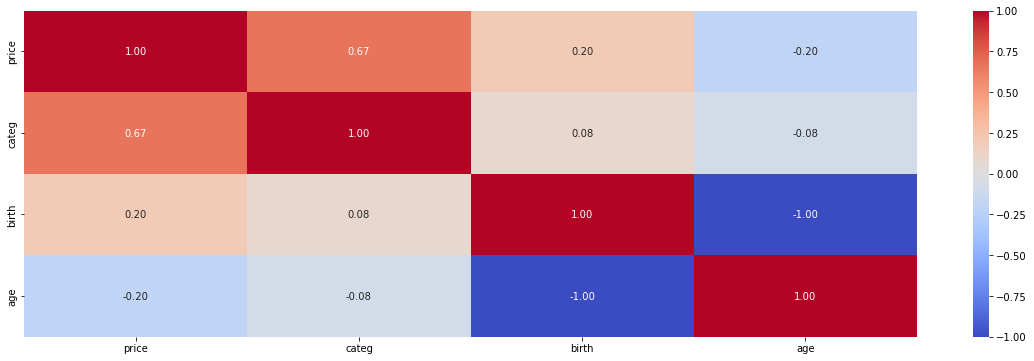

In [114]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(df_finale2.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

### 4.2.2 Comportements des clients en fonction du genre

#### Lien entre genre et CA

In [115]:
fc = customers[customers['sex'] == 'f']
mc = customers[customers['sex'] == 'm']
print(fc.count() ,mc.count())

client_id    4490
sex          4490
birth        4490
age          4490
dtype: int64 client_id    4131
sex          4131
birth        4131
age          4131
dtype: int64


In [116]:
fcp = fc.count() / ( fc.count() + mc.count()) * 100
fcp

client_id    52.082125
sex          52.082125
birth        52.082125
age          52.082125
dtype: float64

In [117]:
mcp = mc.count() / ( fc.count() + mc.count()) * 100
mcp

client_id    47.917875
sex          47.917875
birth        47.917875
age          47.917875
dtype: float64

In [118]:
# On créé une df avec le CA et le genre
df_genre  = df_finale2[['price','sex']]
df_genre

,price,sex
0,4.18,f
1,3.99,f
2,13.21,f
3,19.37,f
4,8.99,f
...,...,...
632472,4.99,m
632473,11.06,m
632474,50.99,f
632475,22.99,f


In [119]:
# On crée une df avec le CA total par genre
df_genre_sex = df_genre.groupby('sex').sum()['price']
df_genre_sex

sex
f    5706084.21
m    5266613.93
Name: price, dtype: float64

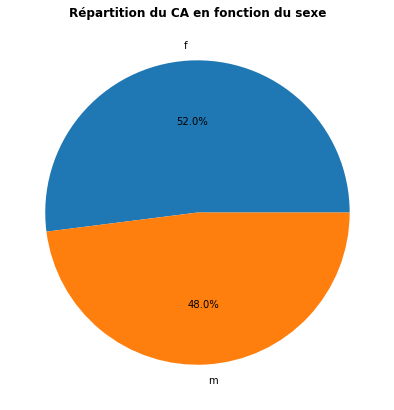

In [120]:

fig = plt.figure(figsize =(15, 7))
plt.pie(df_genre_sex, labels = df_genre_sex.index, autopct='%1.1f%%')
plt.title('Répartition du CA en fonction du sexe', fontweight ="bold")
plt.show()



52 % des achats sont effectués par des femmes et 48 % des achats par des hommes.

#### Lien entre genre et catégorie des ventes


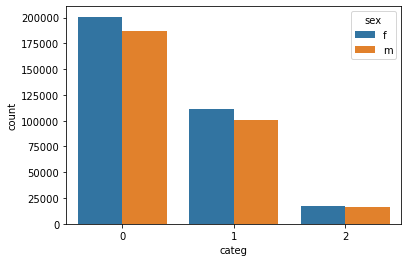

In [121]:
import seaborn as sns
sns.countplot(x='categ', hue = 'sex', data = df_finale2);

Remarques :
- On remarque que pour chacune des catégories, les femmes achètent plus que les hommes.

On pose deux hypothèses :
- H0 : Les variables catégories et sexe sont indépendantes
- H1 : Les variables sont liées

Nous avons ici deux variables qualitatives, nous utiliserons le test d'indépendance du khi2 pour déterminer si ces variables ont un lien.

Condition d'application :
- Effectif théorique > 5

In [122]:
# On crée un tableau de contigence
contingence_sc = pd.crosstab(df_finale2['categ'],df_finale2['sex'])
contingence_sc

sex,f,m
categ,,
0,200793,186488
1,111331,101017
2,16980,15868


In [123]:
# On calcule le khi2
from scipy import stats

stats.chi2_contingency(contingence_sc, correction = True)


(20.2134606935139,
 4.0804003892173473e-05,
 2,
 array([[201518.35754344, 185762.64245656],
        [110493.46646914, 101854.53353086],
        [ 17092.17598743,  15755.82401257]]))

In [124]:
# On calcule le khi2
import researchpy as rp
ctab,chitest, expected = rp.crosstab(df_finale2['categ'],df_finale2['sex'],
margins = False, test = 'chi-square', expected_freqs = True)

print (ctab)
print (chitest)
print (expected)
 

          sex        
sex         f       m
categ                
0      200793  186488
1      111331  101017
2       16980   15868
                Chi-square test  results
0  Pearson Chi-square ( 2.0) =   20.2135
1                    p-value =    0.0000
2                 Cramer's V =    0.0057
                 sex               
sex                f              m
categ                              
0      201518.357543  185762.642457
1      110493.466469  101854.533531
2       17092.175987   15755.824013


On observe :
- Un degré de liberté de 2
- Khi2 de 20.21
- P-value de 0
- Coefficient V de Cramer de 0.006

Les deux variables sont liées :
- 20.21 > 5.99 (cf table du khi2)
- P-value < alpha =< 0.05

Toute fois le coefficient V de Cramer est de 0.0057, ce qui indique une corrélation faible (car proche de 0).

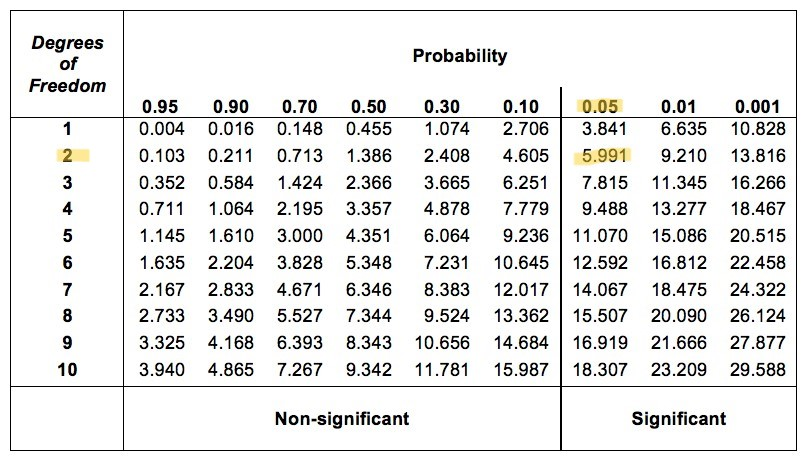

Heatmap

### 4.2.3 Comportements liés à l'âge des clients

In [125]:
# Je crée une nouvelle df pour avoir le montant total des achats par client ainsi que les informations sur la clientèle (âge et genre)
df_age_clt = pd.merge(df_clt_particulier, customers, on=('client_id'), how='inner')
df_age_clt


,client_id,price,sex,birth,age
0,c_1,558.18,m,1955,67
1,c_10,1353.60,m,1956,66
2,c_100,254.85,m,1992,30
3,c_1000,2261.89,f,1966,56
4,c_1001,1812.86,m,1982,40
...,...,...,...,...,...
8591,c_995,189.41,m,1955,67
8592,c_996,1625.58,f,1970,52
8593,c_997,1490.01,f,1994,28
8594,c_998,2779.88,m,2001,21


In [126]:
df_age_clt.loc[(df_age_clt['age'] <= 25), 'Tranche d age'] = '18-25 ans'
df_age_clt.loc[(df_age_clt['age']  > 25 ) &(df_age_clt['age'] <= 35),'Tranche d age'] = '26-35 ans'
df_age_clt.loc[(df_age_clt['age'] > 35) &(df_age_clt['age'] <= 50),'Tranche d age'] = '36-50 ans'
df_age_clt.loc[(df_age_clt['age'] > 50) &(df_age_clt['age'] <= 65),'Tranche d age'] = '51-65 ans'
df_age_clt.loc[(df_age_clt['age'] >= 66), 'Tranche d age'] = '66 ans et plus'
df_age_clt

                                                           

,client_id,price,sex,birth,age,Tranche d age
0,c_1,558.18,m,1955,67,66 ans et plus
1,c_10,1353.60,m,1956,66,66 ans et plus
2,c_100,254.85,m,1992,30,26-35 ans
3,c_1000,2261.89,f,1966,56,51-65 ans
4,c_1001,1812.86,m,1982,40,36-50 ans
...,...,...,...,...,...,...
8591,c_995,189.41,m,1955,67,66 ans et plus
8592,c_996,1625.58,f,1970,52,51-65 ans
8593,c_997,1490.01,f,1994,28,26-35 ans
8594,c_998,2779.88,m,2001,21,18-25 ans


In [127]:
df_tranche_age = df_age_clt.groupby('Tranche d age').count()
df_tranche_age = df_tranche_age.drop(columns =['price','sex','birth','age'])
df_tranche_age

,client_id
Tranche d age,
18-25 ans,1434
26-35 ans,1656
36-50 ans,2541
51-65 ans,1899
66 ans et plus,1066


In [128]:
df_tranche_age.rename(columns={"client_id": "Nb de clients par tranche d age"},inplace=True)
df_tranche_age['pourcentage'] = df_tranche_age['Nb de clients par tranche d age'] / df_tranche_age['Nb de clients par tranche d age'].sum()*100
df_tranche_age

,Nb de clients par tranche d age,pourcentage
Tranche d age,,
18-25 ans,1434,16.682178
26-35 ans,1656,19.264774
36-50 ans,2541,29.560261
51-65 ans,1899,22.091671
66 ans et plus,1066,12.401117


Text(0, 0.5, 'Nombre de clients')

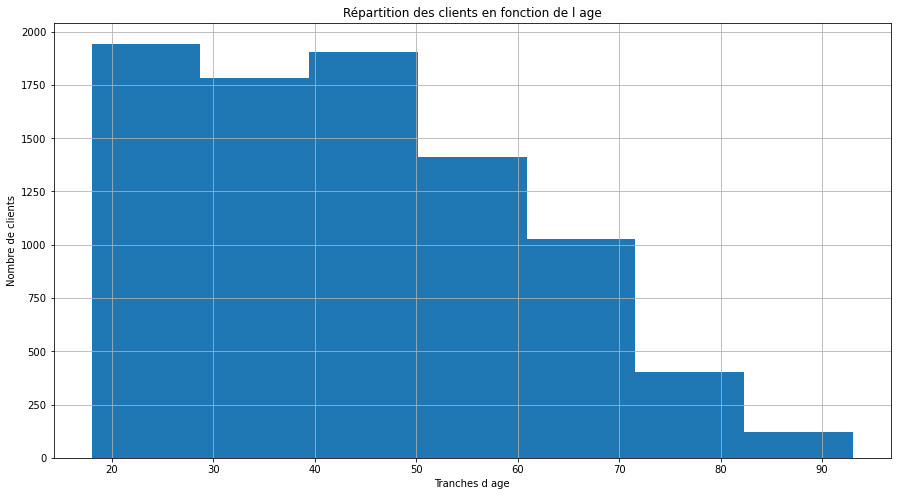

In [129]:
# Nous cherchons à mettre en évidence le répartitions des clients en fonction de leur age
# Nous utilisons ici le module matplotlib de la librairie pyplot pour faire un graphique de type histogramme

df_age_clt['age'].hist(bins=7, figsize=(15,8))
plt.title('Répartition des clients en fonction de l age')
plt.xlabel('Tranches d age')
plt.ylabel('Nombre de clients')

Avant de commencer les tests statistiques, nous chercherons à savoir si la variable âge suit une loi normale, nous pouvons constater graphiquement  que la distribition ne semble pas suivre la loi normale, mais nous devons le vérifier.

#### **Test de normalité de la variable age**

**Coefficient d'asymétrie**

Il est utile à l'évaluation de défaut de symétrie d'une distribution. 
Il est :
- nul pour une distribution symétrique
- positif dans le cas d'une distribution étalée à droite
- négatif pour une distribution étalée à gauche

In [130]:
# On calcule le coefficient d'asymétrie grâce à .skew()
df_finale2['age'].skew()

0.5909332500492255

Le coefficient d'asymétrie est d'environ 0.59 (donc positif) ce qui reflète une distribution étalée à droite et laisser penser que la variable ne suit pas une loi normale.

**Coefficient d'applatissement**

Il permet d'évaluer la dispersion des valeurs extrêmes par rapport à la loi normale, il reflète la répartition des données autour du centre. Il est :
- nul pour une distribution normale
- positif dans le cas d'une distribution moins applatie qu'une distribution normale
- négatif pour une distribution uniforme

In [131]:
# On calcule le coefficient d'applatissement grâce à .kurtosis()
df_finale2['age'].kurtosis()

0.3346881108518507

Le coefficient d'applatissement est d'environ 0.33 ce qui reflète une distribution moins applatie qu'une distribution normale et laisser penser que la variable ne suit pas une loi normale.

**Test de Kolmogorov-Smirnov**

Le test de Kolmogorov-Smirnov est un test d'hypothèse non paramétrique utilisé pour déterminer si un échantillon suit bien une loi donnée connue par sa fonction de répartition continue (dans notre cas la loi normale). Ou si deux échantillons suivent la même loi. 

On a deux hypothèses : 

 - H0 : la variable / les variables suit / suivent une loi donnée connue (ici loi normale)
 - H1 : la variable / les variables ne suit / ne suivent pas loi donnée connue 
 
L'hypothèse H0 est accepté si la P-value est supérieure à 0.05 (par convention nous utliserons alpha = 0.05), dans le cas contraire l'hypothèse H0 est rejetée.

La P-value  est la probabilité pour un modèle statistique donné sous l'hypothèse nulle (H0) d'obtenir une valeur au moins aussi extrême que celle observée. 

In [132]:
# Nous allons calculer la P-value dans le cadre du test non paramétrique de Kolmogorov-Smirnov afin de savoir si 
    # la variable age suit une loi normale ou non
# On utilise 'norm', pour comparer la distribution de l'age à la loi normale
stats.kstest(df_finale2['age'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

- On observe ici une P-value de 0
- Rejet de H0
- La variable age ne suit pas une distribution normale

**Test de Jarque-Bera**

Le test de Jarque-Bera est un test d'hypothèse qui cherche à déterminer si des données suivent une loi normale. 

On a deux hypothèses : 

 - H0 : la variable suit une loi normale
 - H1 : la variable ne suit pas une loi normale
 
L'hypothèse H0 est accepté si la P-value est supérieure à 0.05 (par convention nous utliserons alpha = 0.05), dans le cas contraire l'hypothèse H0 est rejetée.


In [133]:
# Nous allons calculer la P-value dans le cadre du test non paramétrique de Jarque-Bera afin de savoir si 
    # la variable age suit une loi normale ou non
stats.jarque_bera(df_finale2['age'])

Jarque_beraResult(statistic=39761.979238032516, pvalue=0.0)

- On observe ici une P-value de 0
- Rejet de H0
- La variable age ne suit pas une distribution normale

**Test de Shapiro-Wilk**

Le test de Shapiro-Wilk est un test d'hypothèse qui cherche à déterminer si un échantillon est issu d'une population normalement distribuée.

On a deux hypothèses : 

 - H0 : la variable suit une loi normale
 - H1 : la variable ne suit pas une loi normale
 
L'hypothèse H0 est accepté si la P-value est supérieure à 0.05 (par convention nous utliserons alpha = 0.05), dans le cas contraire l'hypothèse H0 est rejetée.

In [134]:
# Nous allons calculer la P-value dans le cadre du test non paramétrique de Shapiro-Wilk afin de savoir si 
    # la variable age suit une loi normale ou non
stats.shapiro(df_finale2['age'])

C:\Users\shana\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9712284803390503, pvalue=0.0)

- On observe ici une P-value de 0
- Rejet de H0
- La variable age ne suit pas une distribution normale

Après avoir effectué plusieurs tests de 'normalité', on peut en conclure que la variable âge ne suit pas une loi normale.

#### Lien entre l'âge des clients et le montant total des ventes

In [135]:
# Nous cherchons à analyser le lien entre l'âge des clients et le montant total des ventes
# Nous allons créer une nouvelle df à partir de celle créer précedemment pour obtenir le CA par age
df_age_clt_group = df_age_clt.groupby('age').sum()
df_age_clt_group = df_age_clt_group.drop(columns='birth')
df_age_clt_group['pourcentage']= 100 * (df_age_clt_group['price'] / (df_age_clt_group['price'].sum()) )

df_age_clt_group


,price,pourcentage
age,,
18,609013.69,5.550264
19,178195.78,1.623992
20,184177.35,1.678506
21,178497.70,1.626744
22,165007.98,1.503805
...,...,...
89,5254.35,0.047886
90,5043.19,0.045961
91,2815.45,0.025659


In [136]:
# Nous réinitialisons l'index de la df
df_age_clt_group = df_age_clt_group.reset_index()
df_age_clt_group

,age,price,pourcentage
0,18,609013.69,5.550264
1,19,178195.78,1.623992
2,20,184177.35,1.678506
3,21,178497.70,1.626744
4,22,165007.98,1.503805
...,...,...,...
71,89,5254.35,0.047886
72,90,5043.19,0.045961
73,91,2815.45,0.025659
74,92,4013.87,0.036581


Nous allons procéder à quelques vérifications, pour voir s'il ne manque pas de données

In [137]:
df_age_clt_group['price'].sum()

10972698.139999997

In [138]:
df_age_clt['price'].sum()

10972698.14

In [139]:
df_finale2['price'].sum()

10972698.140000002

On a le meme CA que pour la df regroupant toutes les données : OK.

Nous allons chercher maintenant s'il existe une liason entre la variable age et la variable price (qui ici représente le CA total par age).

Pour cela, nous allons effectuer des tests statistiques, mais il va falloir pour déterminer quel type de test utilisé, chercher à comprendre le type de distribution des variables. 

Pour rappel : 
- la variable age ne suit pas la loi normale
- Les variables sont de types quantitatives
- Nous allons donc effectuer 
    - le test paramétrique de Pearson (dans le cas d'une distribution normale) OU
    - le test non paramétrique de Spearman
    

Text(0, 0.5, 'Total CA par age')

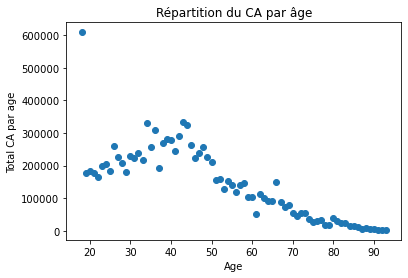

In [140]:
# Nous cherchons à mettre en évidence le répartitions du CA total par age
# Nous utilisons ici le module matplotlib de la librairie pyplot pour faire un graphique de type nuage de points
plt.scatter(df_age_clt_group['age'],df_age_clt_group['price'])
plt.title('Répartition du CA par âge')
plt.xlabel('Age')
plt.ylabel('Total CA par age')



Nous pouvons observer une certaine tendance, croissant de 20 à 40 ans et décroissante de 40 à +90 ans

**Coefficient d'applatissement**

Il permet d'évaluer la dispersion des valeurs extrêmes par rapport à la loi normale, il reflète la répartition des données autour du centre. Il est :
- nul pour une distribution normale
- positif dans le cas d'une distribution moins applatie qu'une distribution normale
- négatif pour une distribution uniforme

In [141]:
df_age_clt_group.kurtosis()

age           -1.200000
price          2.174836
pourcentage    2.174836
dtype: float64

**Coefficient d'asymétrie**

Il est utile à l'évaluation de défaut de symétrie d'une distribution. 
Il est :
- nul pour une distribution symétrique
- positif dans le cas d'une distribution étalée à droite
- négatif pour une distribution étalée à gauche

In [142]:
df_age_clt_group.skew()

age            0.000000
price          0.958476
pourcentage    0.958476
dtype: float64

**Test de Kolmogorov-Smirnov**

Le test de Kolmogorov-Smirnov est un test d'hypothèse non paramétrique utilisé pour déterminer si un échantillon suit bien une loi donnée connue par sa fonction de répartition continue. Ou si deux échantillons suivent la même loi. 

On a deux hypothèses : 

 - H0 : la variable / les variables suit / suivent une loi donnée connue 
 - H1 : la variable / les variables ne suit / ne suivent pas loi donnée connue 
 
L'hypothèse H0 est accepté si la P-value est supérieure à 0.05 (par convention nous utliserons alpha = 0.05), dans le cas contraire l'hypothèse H0 est rejetée.

La P-value  est la probabilité pour un modèle statistique donné sous l'hypothèse nulle (H0) d'obtenir une valeur au moins aussi extrême que celle observée. 

In [143]:
stats.kstest(df_age_clt_group['price'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

P-value = 0 la variable 'price' ne suit pas la loi normale.

In [144]:
stats.kstest(df_age_clt_group['price'], df_age_clt_group['age'])

KstestResult(statistic=1.0, pvalue=5.42208950250435e-45)

P-valu < 0.05, les deux variables suivre la même loi de distribution

**Test de Pearson**

Le test de Pearson est un test statistique paramétrique qui cherche à déterminer si des variables (quantitatives) sont liées. 

On a deux hypothèses : 

 - H0 : les variables sont liées
 - H1 : les variables ne sont pas liées
 
L'hypothèse H0 est accepté si la P-value est supérieure à 0.05 (par convention nous utliserons alpha = 0.05), dans le cas contraire l'hypothèse H0 est rejetée.

Condition d'application :
- Les données doivent suivre la loi normale

La condition d'application du test paramétrique de Pearson n'est pas remplie, nous effectuerons un test de Spearman. Toutefois, voici le résultat que nous aurions obtenu avec le test de Pearson.

In [145]:
stats.pearsonr(df_age_clt_group['age'], df_age_clt_group['price'])

(-0.8306553438502088, 1.678392818340079e-20)

**Test de Spearman**

Le test de Spearman est l'équivalent non-paramétrique de la corrélation de Pearson. Il permet d'établir la dépendance ou l'indépendance entre deux variables (quantitatives).

On a deux hypothèses : 

 - H0 : les variables ne sont pas liées
 - H1 : les variables sont liées
 
L'hypothèse H0 est accepté si la P-value est supérieure à 0.05 (par convention nous utliserons alpha = 0.05), dans le cas contraire l'hypothèse H0 est rejetée.

In [146]:
stats.spearmanr(df_age_clt_group['age'], df_age_clt_group['price'])

SpearmanrResult(correlation=-0.8736842105263158, pvalue=7.352708223159905e-25)

On observe : 
- PValue < 0.05
- Corrélation de - 0.87 

On peut donc rejeter H0
Les deux variables sont liées et il existe un lien de corrélation (négatif) très fort (car valeur absolue proche de 1). 

Plus les clients sont jeunes plus le CA par age est élevé 

#### Lien entre l'âge des clients et la taille du panier moyen

In [147]:
# On crée une df avec le montant total d'achat par client en conservant l'age
df_age_nb = df_age_clt.drop(columns =['sex','birth'])
df_age_nb

,client_id,price,age,Tranche d age
0,c_1,558.18,67,66 ans et plus
1,c_10,1353.60,66,66 ans et plus
2,c_100,254.85,30,26-35 ans
3,c_1000,2261.89,56,51-65 ans
4,c_1001,1812.86,40,36-50 ans
...,...,...,...,...
8591,c_995,189.41,67,66 ans et plus
8592,c_996,1625.58,52,51-65 ans
8593,c_997,1490.01,28,26-35 ans
8594,c_998,2779.88,21,18-25 ans


In [148]:
# On crée une nouvelle df permettant de connaitre le nombre de client par classe d'age
df_age_nb2 = df_age_nb.groupby('age').count()
df_age_nb2 = df_age_nb2.drop(columns =['price'])
df_age_nb2 = df_age_nb2.rename(columns={'client_id': 'Nombre de clients'})
df_age_nb2 = df_age_nb2.reset_index()
df_age_nb2 

,age,Nombre de clients,Tranche d age
0,18,437,437
1,19,145,145
2,20,145,145
3,21,125,125
4,22,136,136
...,...,...,...
71,89,8,8
72,90,6,6
73,91,4,4
74,92,4,4


In [149]:
#On crée une nouvelle df avec les df précédentes, on rajoute une colonne afin d'obtenir le panier moyen total par tranche d'age
df_age_achat =  pd.merge(df_age_nb2, df_age_clt_group, how='inner', on='age')
df_age_achat['Achat moyen'] = (df_age_achat['price'] )/ (df_age_achat['Nombre de clients']) 

df_age_achat

,age,Nombre de clients,Tranche d age,price,pourcentage,Achat moyen
0,18,437,437,609013.69,5.550264,1393.624005
1,19,145,145,178195.78,1.623992,1228.936414
2,20,145,145,184177.35,1.678506,1270.188621
3,21,125,125,178497.70,1.626744,1427.981600
4,22,136,136,165007.98,1.503805,1213.293971
...,...,...,...,...,...,...
71,89,8,8,5254.35,0.047886,656.793750
72,90,6,6,5043.19,0.045961,840.531667
73,91,4,4,2815.45,0.025659,703.862500
74,92,4,4,4013.87,0.036581,1003.467500


FAIRE UN GRAPH

In [150]:
# On crée une nouvelle df regroupée par age inculant la moyenne des prix et donc le panier moyen par client et par age
panier_moyen = df_finale2.groupby(['age']).mean()['price']
panier_moyen = pd.DataFrame(panier_moyen)
panier_moyen = panier_moyen .rename(columns={'price': 'Montant du panier moyen'})
panier_moyen

,Montant du panier moyen
age,
18,40.201577
19,40.767737
20,40.178305
21,41.979704
22,37.391339
...,...
89,16.117638
90,16.216045
91,16.561471


In [151]:
# On réinitialise l'index de la df
panier_moyen = panier_moyen.reset_index()
panier_moyen

,age,Montant du panier moyen
0,18,40.201577
1,19,40.767737
2,20,40.178305
3,21,41.979704
4,22,37.391339
...,...,...
71,89,16.117638
72,90,16.216045
73,91,16.561471
74,92,17.760487


<AxesSubplot:xlabel='age', ylabel='Montant du panier moyen'>

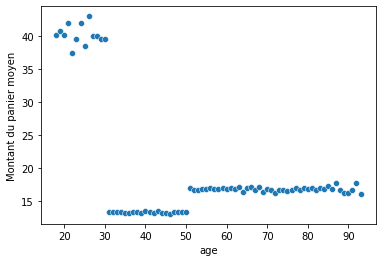

In [152]:
sns.scatterplot(x='age',y='Montant du panier moyen', data = panier_moyen)

On observe qu'il n'y a pas de tendance linéaire. Toute fois certaines catégorie d'âge semblent avoir des paniers moyen d'un montant égal.*
18- 30 ans : autour de 40 euros
30 - 50 ans : panier moyen en dessous de 15 euros ( entre 7 et 10)
50 ans et + : panier moyen autour des 17.5 euros

**Coefficient d'applatissement**

Il permet d'évaluer la dispersion des valeurs extrêmes par rapport à la loi normale, il reflète la répartition des données autour du centre. Il est :
- nul pour une distribution normale
- positif dans le cas d'une distribution moins applatie qu'une distribution normale
- négatif pour une distribution uniforme


In [153]:
panier_moyen.kurtosis()

age                       -1.200000
Montant du panier moyen    1.117288
dtype: float64

**Coefficient d'asymétrie**

Il est utile à l'évaluation de défaut de symétrie d'une distribution. 
Il est :
- nul pour une distribution symétrique
- positif dans le cas d'une distribution étalée à droite
- négatif pour une distribution étalée à gauche

In [154]:
panier_moyen.skew()

age                        0.000000
Montant du panier moyen    1.691523
dtype: float64

**Test de Kolmogorov-Smirnov**

Le test de Kolmogorov-Smirnov est un test d'hypothèse non paramétrique utilisé pour déterminer si un échantillon suit bien une loi donnée connue par sa fonction de répartition continue. Ou si deux échantillons suivent la même loi. 

On a deux hypothèses : 

 - H0 : la variable / les variables suit / suivent une loi donnée connue 
 - H1 : la variable / les variables ne suit / ne suivent pas loi donnée connue 
 
L'hypothèse H0 est accepté si la P-value est supérieure à 0.05 (par convention nous utliserons alpha = 0.05), dans le cas contraire l'hypothèse H0 est rejetée.

La P-value  est la probabilité pour un modèle statistique donné sous l'hypothèse nulle (H0) d'obtenir une valeur au moins aussi extrême que celle observée. 


In [155]:
stats.kstest(panier_moyen['Montant du panier moyen'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

P-value = 0 
La variable Montant du panier moyen ne suit pas la loi normale

In [156]:
stats.kstest(panier_moyen['age'], panier_moyen['Montant du panier moyen'])

KstestResult(statistic=0.8289473684210527, pvalue=1.1874582768381313e-26)

P-value < 0.05 : Les variables suivent elle une même loi de distribution ?

**Test de Pearson**

Le test de Pearson est un test statistique paramétrique qui cherche à déterminer si des variables (quantitatives) sont liées. 

On a deux hypothèses : 

 - H0 : les variables sont liées
 - H1 : les variables ne sont pas liées
 
L'hypothèse H0 est accepté si la P-value est supérieure à 0.05 (par convention nous utliserons alpha = 0.05), dans le cas contraire l'hypothèse H0 est rejetée.

Condition d'application :
- Les données doivent suivre la loi normale

La condition d'application du test paramétrique de Pearson n'est pas remplie, nous effectuerons un test de Spearman. Toutefois, voici le résultat que nous aurions obtenu avec le test de Pearson.

In [157]:
stats.pearsonr(panier_moyen['age'], panier_moyen['Montant du panier moyen'])

(-0.546932479486264, 3.190679297453459e-07)

Pvalue < 0.05 
Coefficient de - 0.54 

D'après le test de Pearson, les variables seraient moyennement liées entre elles.

**Test de Spearman**

Le test de Spearman est l'équivalent non-paramétrique de la corrélation de Pearson. Il permet d'établir la dépendance ou l'indépendance entre deux variables (quantitatives).

On a deux hypothèses : 

 - H0 : les variables ne sont pas liées
 - H1 : les variables sont liées
 
L'hypothèse H0 est accepté si la P-value est supérieure à 0.05 (par convention nous utliserons alpha = 0.05),

In [158]:
stats.spearmanr(panier_moyen['age'], panier_moyen['Montant du panier moyen'])

SpearmanrResult(correlation=-0.08503075871496923, pvalue=0.4651947762633266)

<AxesSubplot:>

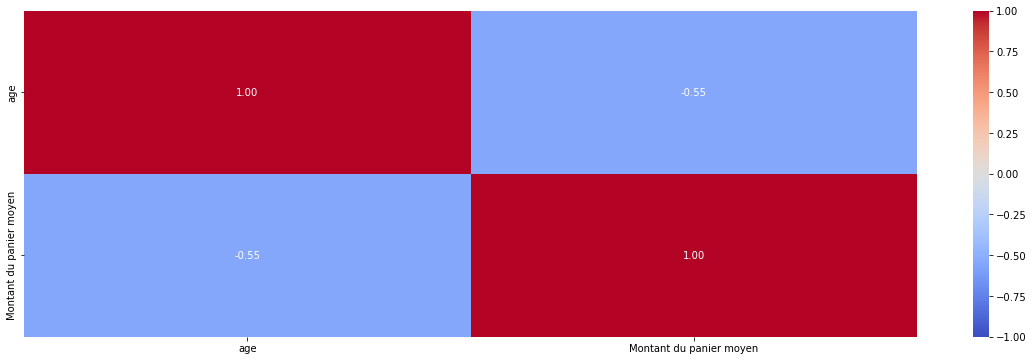

In [159]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(panier_moyen.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

#### Lien entre l'âge des clients et la fréquence d'achat

In [160]:
# On crée une df avec le nombre de session par age
df_age_freq = df_finale2.groupby(['age']).count()
df_age_freq = df_age_freq.drop(columns =['id_prod','date','client_id','price','categ','sex','birth'])
df_age_freq = df_age_freq.reset_index()
df_age_freq

,age,session_id
0,18,15149
1,19,4371
2,20,4584
3,21,4252
4,22,4413
...,...,...
71,89,326
72,90,311
73,91,170
74,92,226


In [161]:
# On rajoute des colonnes à la df afin de determiné la moyenne du nombre d'achats par classe d'age
df_age_freq2 = pd.merge(df_age_freq, df_age_nb2, on=('age'), how='inner')
df_age_freq2 ['Nb achats moyen par client'] = (df_age_freq2['session_id'] )/ (df_age_freq2['Nombre de clients']) 
df_age_freq2 ['Nb achats moyen par client et par an'] = ((df_age_freq2['session_id'] )/ (df_age_freq2['Nombre de clients'])) /2
df_age_freq2

,age,session_id,Nombre de clients,Tranche d age,Nb achats moyen par client,Nb achats moyen par client et par an
0,18,15149,437,437,34.665904,17.332952
1,19,4371,145,145,30.144828,15.072414
2,20,4584,145,145,31.613793,15.806897
3,21,4252,125,125,34.016000,17.008000
4,22,4413,136,136,32.448529,16.224265
...,...,...,...,...,...,...
71,89,326,8,8,40.750000,20.375000
72,90,311,6,6,51.833333,25.916667
73,91,170,4,4,42.500000,21.250000
74,92,226,4,4,56.500000,28.250000


<AxesSubplot:xlabel='age', ylabel='Nb achats moyen par client et par an'>

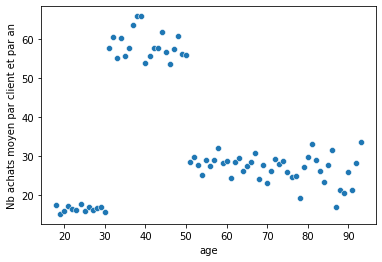

In [162]:
# On fait un nuage de point 
sns.scatterplot(x='age',y='Nb achats moyen par client et par an', data = df_age_freq2)

<AxesSubplot:xlabel='age', ylabel='Nb achats moyen par client'>

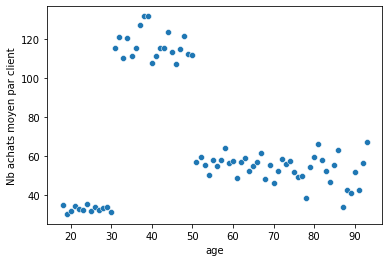

In [163]:
# On fait un nuage de point 
sns.scatterplot(x='age',y='Nb achats moyen par client', data = df_age_freq2)

On teste la normalité de la variable Nb achats moyen par client et par an

**Coefficient d'applatissement**

Il permet d'évaluer la dispersion des valeurs extrêmes par rapport à la loi normale, il reflète la répartition des données autour du centre. Il est :
- nul pour une distribution normale
- positif dans le cas d'une distribution moins applatie qu'une distribution normale
- négatif pour une distribution uniforme

In [164]:
df_age_freq2.kurtosis()

age                                    -1.200000
session_id                             -0.597277
Nombre de clients                       3.372219
Tranche d age                           3.372219
Nb achats moyen par client             -0.794810
Nb achats moyen par client et par an   -0.794810
dtype: float64

**Coefficient d'asymétrie**

Il est utile à l'évaluation de défaut de symétrie d'une distribution. 
Il est :
- nul pour une distribution symétrique
- positif dans le cas d'une distribution étalée à droite
- négatif pour une distribution étalée à gauche

In [165]:
df_age_freq2.skew()

age                                     0.000000
session_id                              0.870038
Nombre de clients                       0.814757
Tranche d age                           0.814757
Nb achats moyen par client              0.842226
Nb achats moyen par client et par an    0.842226
dtype: float64

**Test de Kolmogorov-Smirnov**

Le test de Kolmogorov-Smirnov est un test d'hypothèse non paramétrique utilisé pour déterminer si un échantillon suit bien une loi donnée connue par sa fonction de répartition continue. Ou si deux échantillons suivent la même loi. 

On a deux hypothèses : 

 - H0 : la variable / les variables suit / suivent une loi donnée connue 
 - H1 : la variable / les variables ne suit / ne suivent pas loi donnée connue 
 
L'hypothèse H0 est accepté si la P-value est supérieure à 0.05 (par convention nous utliserons alpha = 0.05), dans le cas contraire l'hypothèse H0 est rejetée.


In [166]:
stats.kstest(df_age_freq2['Nb achats moyen par client et par an'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

P-value < 0.05 la variable ne suit pas la loi normale

In [167]:
stats.kstest(df_age_freq2['Nb achats moyen par client et par an'], df_age_freq2['age'])

KstestResult(statistic=0.5263157894736842, pvalue=5.633103210700766e-10)

P-value < 0.05 les variables suivent elle la même loi de distribution ? 

**Test de Pearson**

Le test de Pearson est un test statistique paramétrique qui cherche à déterminer si des variables (quantitatives) sont liées. 

On a deux hypothèses : 

 - H0 : les variables sont liées
 - H1 : les variables ne sont pas liées
 
L'hypothèse H0 est accepté si la P-value est supérieure à 0.05 (par convention nous utliserons alpha = 0.05), dans le cas contraire l'hypothèse H0 est rejetée.

Condition d'application :
- Les données doivent suivre la loi normale

La condition d'application du test paramétrique de Pearson n'est pas remplie, nous effectuerons un test de Spearman. Toutefois, voici le résultat que nous aurions obtenu avec le test de Pearson.

In [168]:
stats.pearsonr(df_age_freq2['age'], df_age_freq2['Nb achats moyen par client et par an'])

(-0.21965970565601273, 0.05657651045993957)

**Test de Spearman**

Le test de Spearman est l'équivalent non-paramétrique de la corrélation de Pearson. Il permet d'établir la dépendance ou l'indépendance entre deux variables (quantitatives).

On a deux hypothèses : 

 - H0 : les variables ne sont pas liées
 - H1 : les variables sont liérs
 
L'hypothèse H0 est accepté si la P-value est supérieure à 0.05 (par convention nous utliserons alpha = 0.05),

In [169]:
stats.spearmanr(df_age_freq2['age'], df_age_freq2['Nb achats moyen par client et par an'])

SpearmanrResult(correlation=0.0, pvalue=1.0)

P-value = 1 > 0.05
Les variables ne sont pas liées.

#### Lien entre l'âge des clients et les catégories des ventes

On a : 
- une variable qualitative : catégorie des ventes
- une variable quantitative : l'âge des clients (qui ne suit pas la loi normale)

On va donc utiliser le test d'ANOVA non paramétrique ou test de Kruskal- Wallis

Text(0, 0.5, 'Âge')

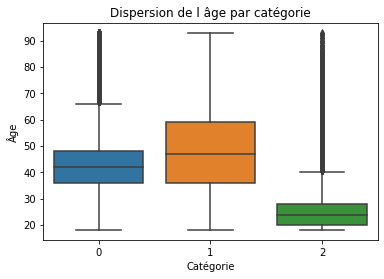

In [170]:
# Nous créons des boites à moustache afin de visualiser les données
dispersion = sns.boxplot(data=df_finale2, x="categ", y="age")
dispersion.set_title('Dispersion de l âge par catégorie')
dispersion.set_xlabel('Catégorie')
dispersion.set_ylabel('Âge')

Nous allons regarder l'âge minimal et maximal des clients par catégorie.

In [171]:
min0 = df_finale2[df_finale2['categ'] == 0.00]['age'].min()
max0 = df_finale2[df_finale2['categ'] == 0.00]['age'].max()

print (min0,max0)

18 93


In [172]:
min1 = df_finale2[df_finale2['categ'] == 1.00]['age'].min()
max1 = df_finale2[df_finale2['categ'] == 1.00]['age'].max()

print (min1,max1)

18 93


In [173]:
min2 = df_finale2[df_finale2['categ'] == 2.00]['age'].min()
max2 = df_finale2[df_finale2['categ'] == 2.00]['age'].max()

print (min2,max2)

18 93


Observation :

- Pour la catégorie 0, une grande partie des clients est agée de 37 à 49 ans environ
- Pour la catégorie 1, une grande partie des clients est agée 37 à 60 ans environ
- Pour la catégorie 2, une grande partie des clients est de 18 à 27 ans environ

**Test de Kruskal- Wallis**

Le test de Kruskal- Wallis est l'équivalent non-paramétrique du test ANOVA à un facteur.  On l'utilise lorsque nous avons k échantillons indépendants, afin de déterminer si les échantillons proviennent d'une même population (avec la meme loi de distribution) ou non.

On a deux hypothèses : 

 - H0 : les variables appartiennent à la même population (suivant la même loi de distribution)
     ou  toutes les médianes sont égales.
     
     Les dispersions des âges dans les différentes catégories sont égales
 - H1 : les variables n'appartiennent pas à la même population (suivant la même loi de distribution)
     OU au moins une médiane est différente.
     
     Les dispersions des âges dans les différentes catégories ne sont pas égales
 
L'hypothèse H0 est accepté si la P-value est supérieure à 0.05 (par convention nous utliserons alpha = 0.05),

In [174]:
a = df_finale2[df_finale2['categ'] == 0.00]['age']
b = df_finale2[df_finale2['categ'] == 1.00]['age']
c = df_finale2[df_finale2['categ'] == 2.00]['age']
stats.kruskal(a, b, c)

KruskalResult(statistic=72209.48289794501, pvalue=0.0)

P-value < 0.05 

Rejet H0

Les médianes des groupes sont différentes, la répartition des âge par catégorie est ingéale.

**Test de Levene (Médiane)**

Le test de Kruskal- Wallis est l'équivalent non-paramétrique du test ANOVA à un facteur.  On l'utilise lorsque nous avons k échantillons indépendants, afin de déterminer si les échantillons proviennent d'une même population (avec la meme loi de distribution) ou non.

On a deux hypothèses : 

 - H0 : les variances sont identiques
     
    
 - H1 : les variances ne sont pas identiques
   
 
L'hypothèse H0 est accepté si la P-value est supérieure à 0.05 (par convention nous utliserons alpha = 0.05),

In [175]:
stats.levene(a, b, c)

LeveneResult(statistic=23872.53196706543, pvalue=0.0)

P-value < 0.05 

Rejet H0

Les variables testées ne sont pas homogènes.

<AxesSubplot:>

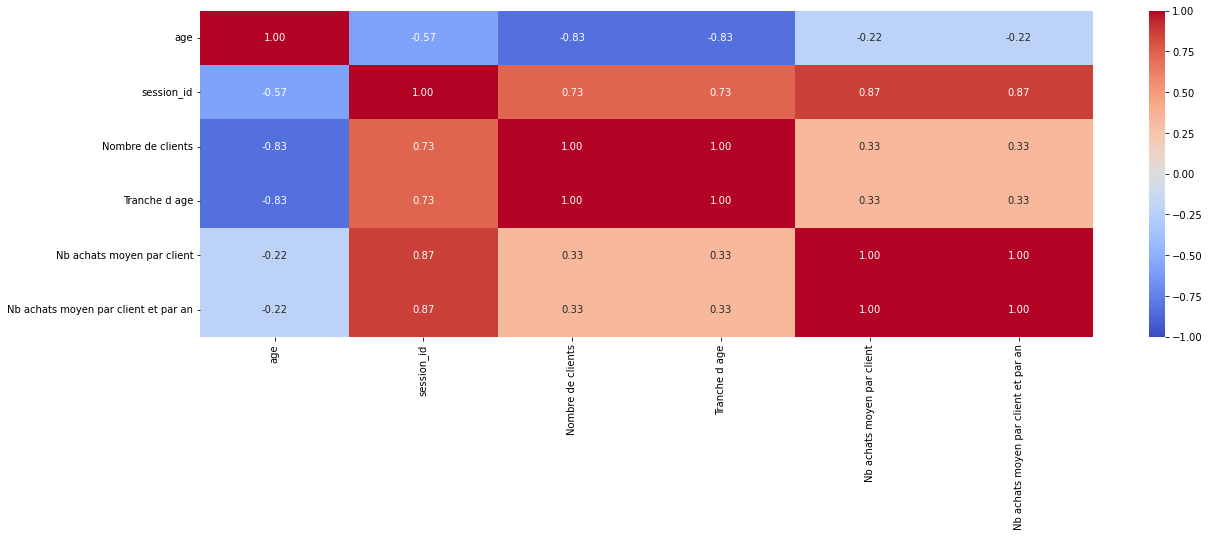

In [176]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(df_age_freq2.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

## 4.3 ZOOM SUR LES REFERENCES

In [177]:
# Nous créons une df pour obtenir le CA par reference
df_ref1 = df_finale2.groupby('id_prod').sum()
df_ref1 = df_ref1.drop(columns =['categ','birth','age'])
df_ref1

,price
id_prod,
0_0,4301.25
0_1,5132.33
0_10,359.00
0_100,61.80
0_1000,2722.32
...,...
2_95,395.96
2_96,26494.23
2_97,1770.89


In [178]:
# Nous créons une df pour obtenir le nombre de ventes par reference
df_ref2 = df_finale2.groupby('id_prod').count()
df_ref2 = df_ref2.drop(columns =['date','client_id','price','categ','sex','birth','age'])
df_ref2

,session_id
id_prod,
0_0,1147
0_1,467
0_10,20
0_100,3
0_1000,398
...,...
2_95,4
2_96,553
2_97,11


In [179]:
# Nous recherchons les referenes avec le plus grand CA (TOP 10)
# La fonction .sort_values() permet de trier la liste
df_ref1.sort_values('price', ascending = False ).head(10)

,price
id_prod,
2_159,91097.76
2_135,63470.80
2_112,58785.90
2_102,55650.74
1_369,50834.81
2_209,50742.75
1_395,49949.77
1_414,48803.84
2_166,48308.40


In [180]:
# Nous recherchons les referenes avec le plus petit CA (FLOP 10)
# La fonction .sort_values() permet de trier la liste
df_ref1.sort_values('price', ascending = True).head(10)

,price
id_prod,
0_1191,0.99
0_1539,0.99
0_1284,1.38
0_1726,1.57
0_1653,1.98
0_1601,1.99
0_1871,1.99
0_541,1.99
0_807,1.99


In [181]:
# Nous recherchons les references les plus vendues (TOP 10)
# La fonction .sort_values() permet de trier la liste

df_ref2.sort_values('session_id', ascending = False ).head(10)

,session_id
id_prod,
1_369,2119
1_417,2048
1_414,2048
1_498,1969
1_425,1961
1_412,1853
1_413,1846
1_407,1818
1_406,1805


In [182]:
# Nous recherchons les references les moins vendues (FLOP 10)
# La fonction .sort_values() permet de trier la liste
df_ref2.sort_values('session_id', ascending = True).head(10)

,session_id
id_prod,
0_833,1
0_1633,1
0_1601,1
0_549,1
0_1871,1
2_98,1
0_2201,1
0_1151,1
0_1539,1


In [183]:
df_ref2.loc[df_ref2['session_id'] ==1]

,session_id
id_prod,
0_1151,1
0_1191,1
0_1284,1
0_1379,1
0_1498,1
0_1533,1
0_1539,1
0_1601,1
0_1633,1


In [184]:
df_categ_vente = df_finale2.groupby('categ').count()
df_categ_vente = df_categ_vente.drop(columns =['id_prod','date','client_id','price','sex','birth','age'])
df_categ_vente

,session_id
categ,
0,387281
1,212348
2,32848


In [185]:
df_categ_ca = df_finale2.groupby('categ').sum()
df_categ_ca= df_categ_ca.drop(columns =['birth','age'])
df_categ_ca

,price
categ,
0,4119200.69
1,4349432.99
2,2504064.46


In [186]:
df_categ = pd.merge(df_categ_ca, df_categ_vente, on=('categ'), how='inner')
df_categ = df_categ.rename(columns={'price': 'CA'})
df_categ = df_categ.rename(columns={'session_id': 'Nombre de ventes'})
df_categ['Pourcentage de ventes '] = (df_categ['Nombre de ventes'] / (df_categ['Nombre de ventes'].sum()))*100
df_categ['Pourcentage CA '] = (df_categ['CA'] / (df_categ['CA'].sum()))*100
df_categ

,CA,Nombre de ventes,Pourcentage de ventes,Pourcentage CA
categ,,,,
0,4119200.69,387281,61.232424,37.540454
1,4349432.99,212348,33.574027,39.638683
2,2504064.46,32848,5.193549,22.820863


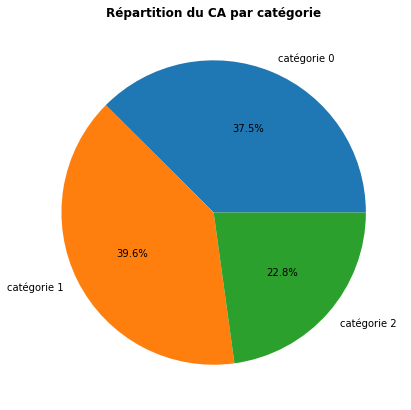

In [187]:

categ = ['catégorie 0', 'catégorie 1', 'catégorie 2']
fig = plt.figure(figsize =(15, 7))
plt.pie(x= df_categ['CA'], labels = categ, autopct='%1.1f%%')
plt.title('Répartition du CA par catégorie', fontweight ="bold")
plt.show()



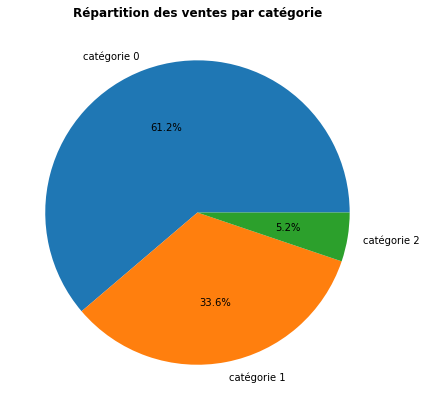

In [188]:
categ = ['catégorie 0', 'catégorie 1', 'catégorie 2']
fig = plt.figure(figsize =(15, 7))
plt.pie(x= df_categ['Nombre de ventes'], labels = categ, autopct='%1.1f%%')
plt.title('Répartition des ventes par catégorie', fontweight ="bold")
plt.show()


# **5. EXPLOITATION DES DONNEES**

In [189]:
  pip install pillow

Note: you may need to restart the kernel to use updated packages.


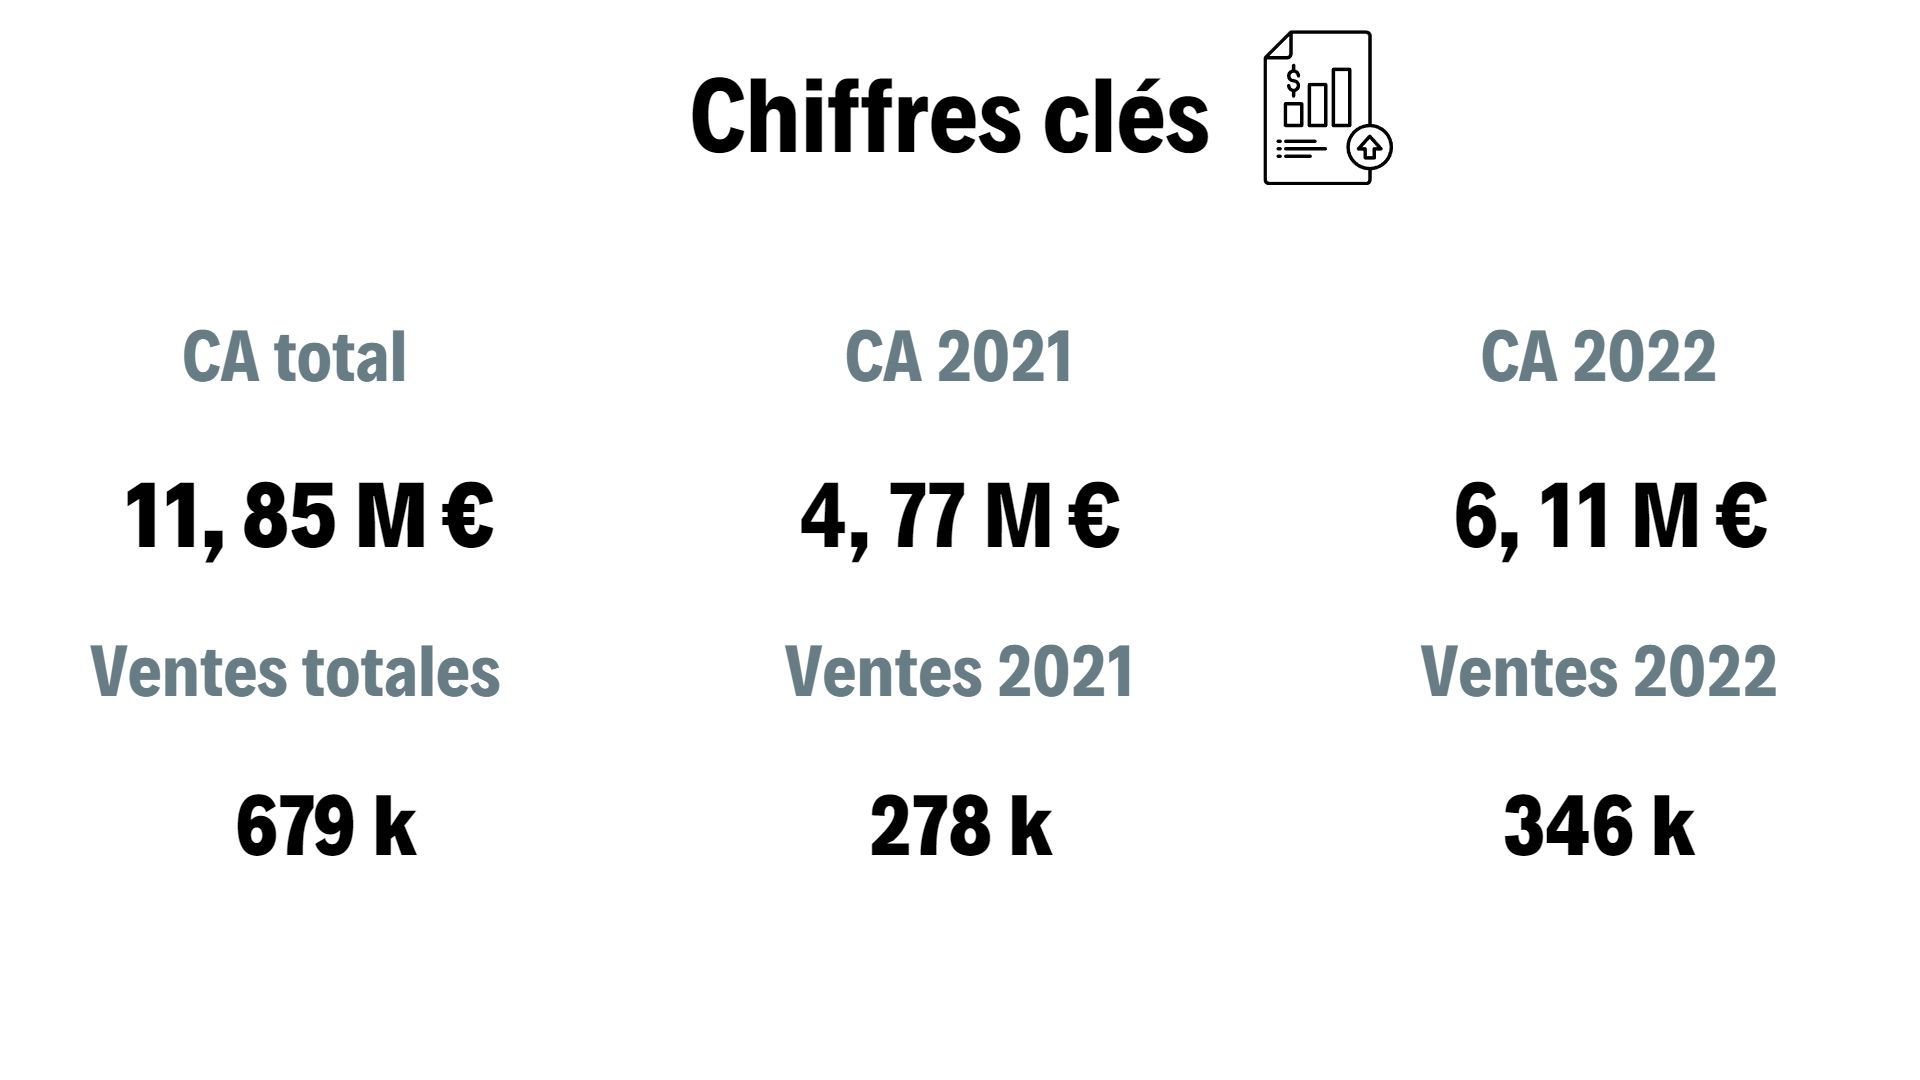

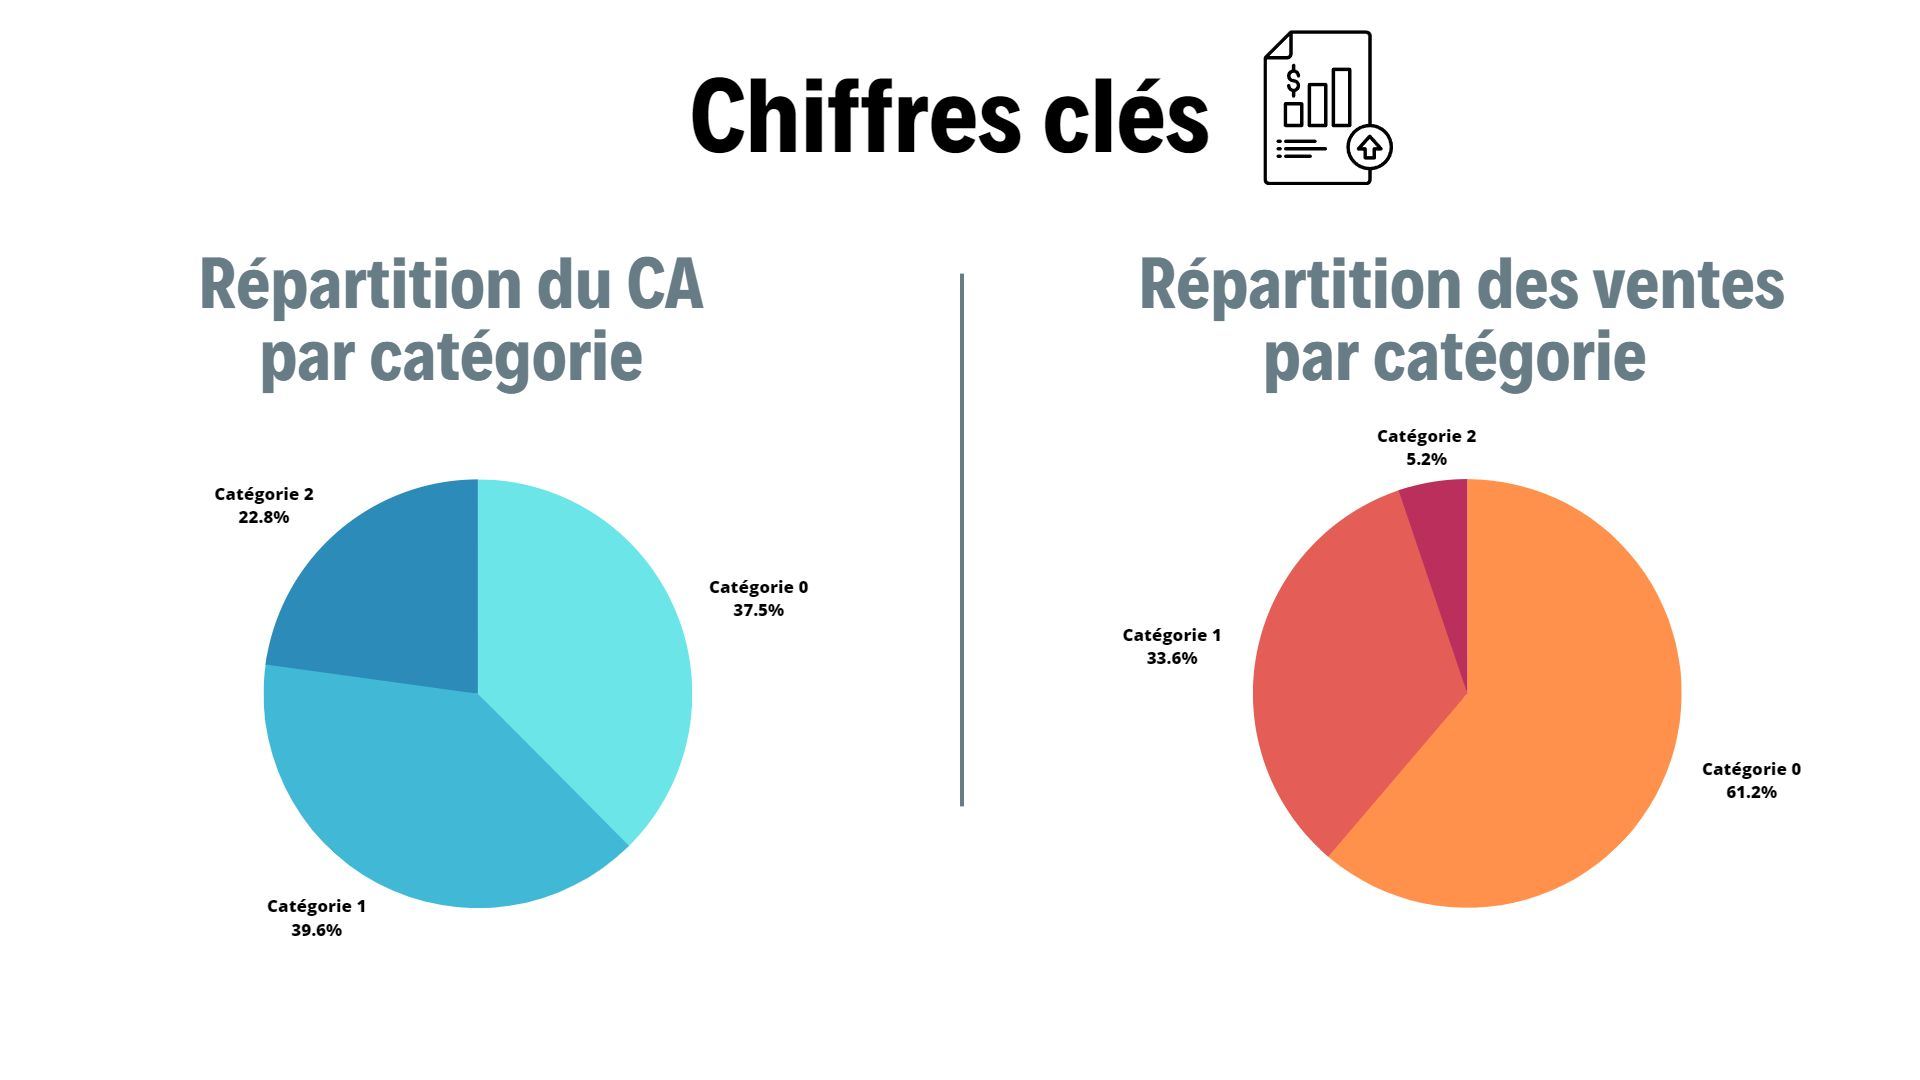

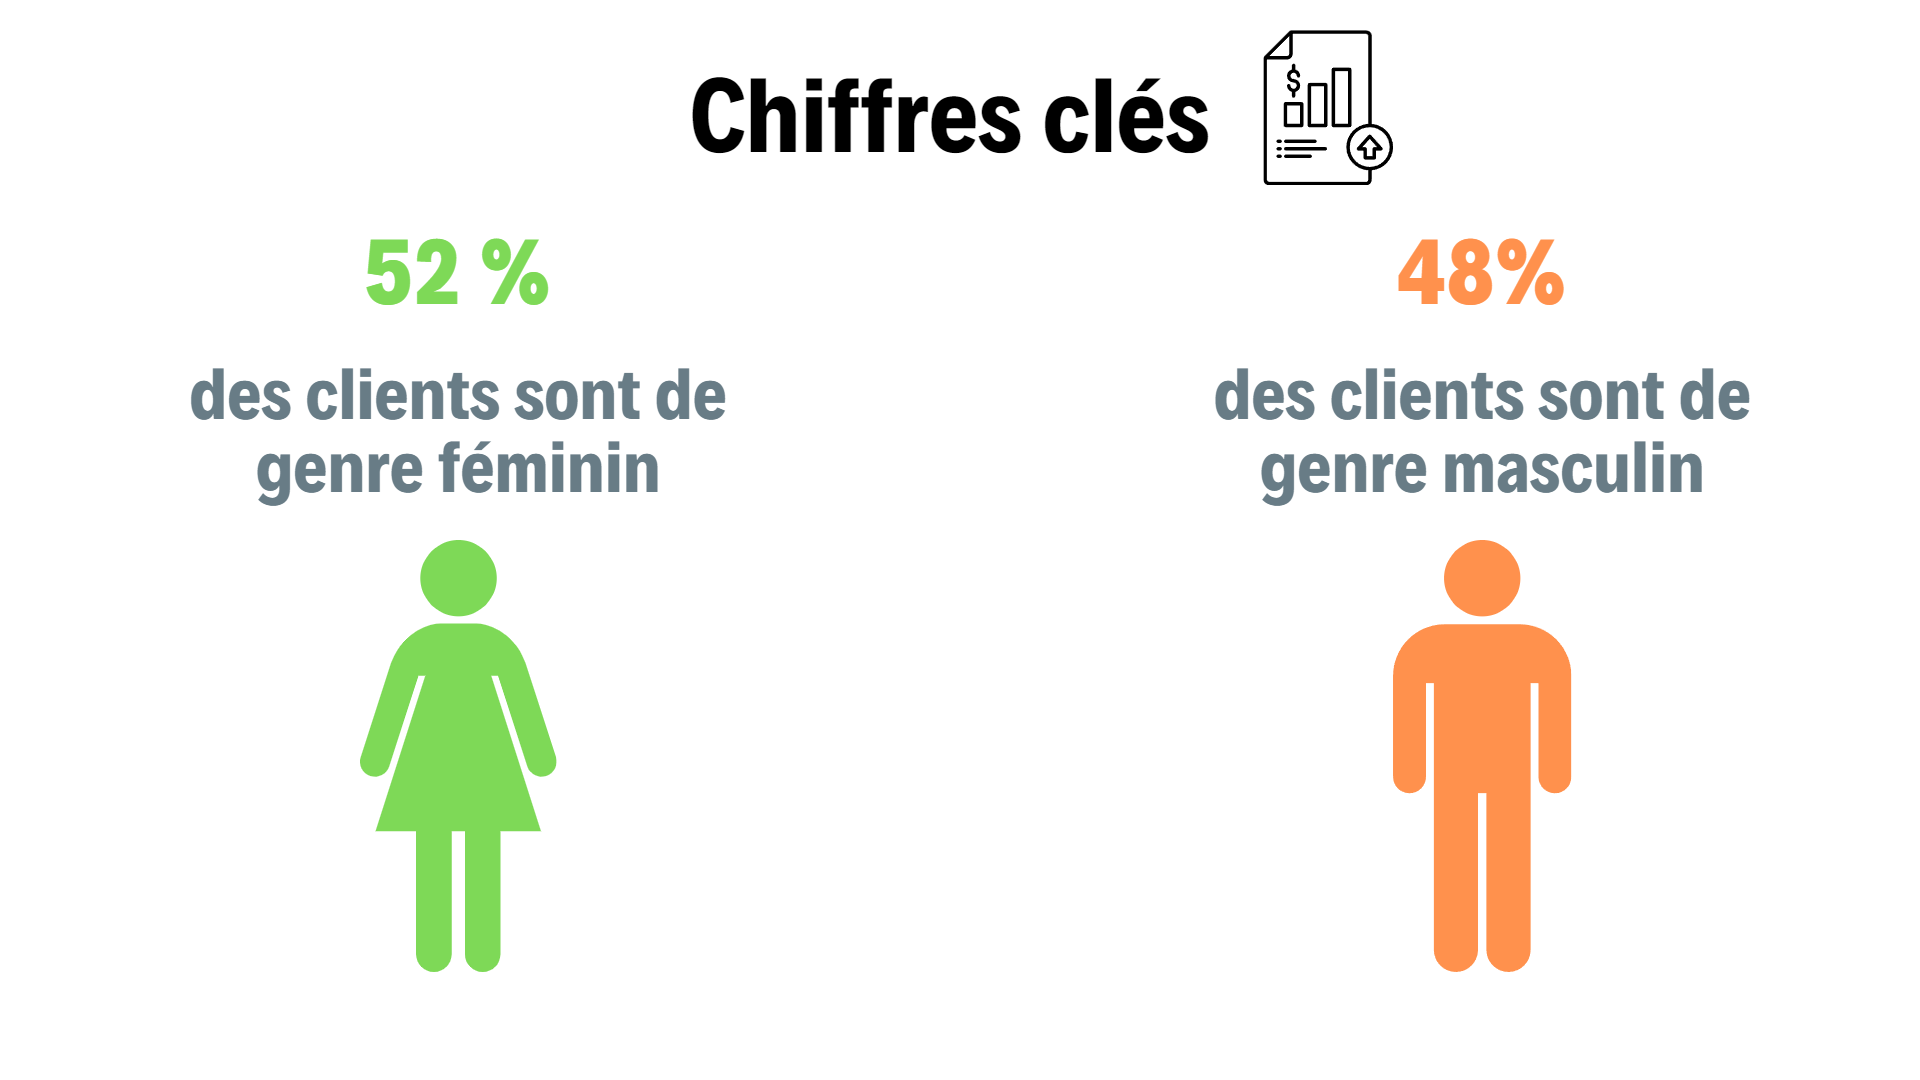


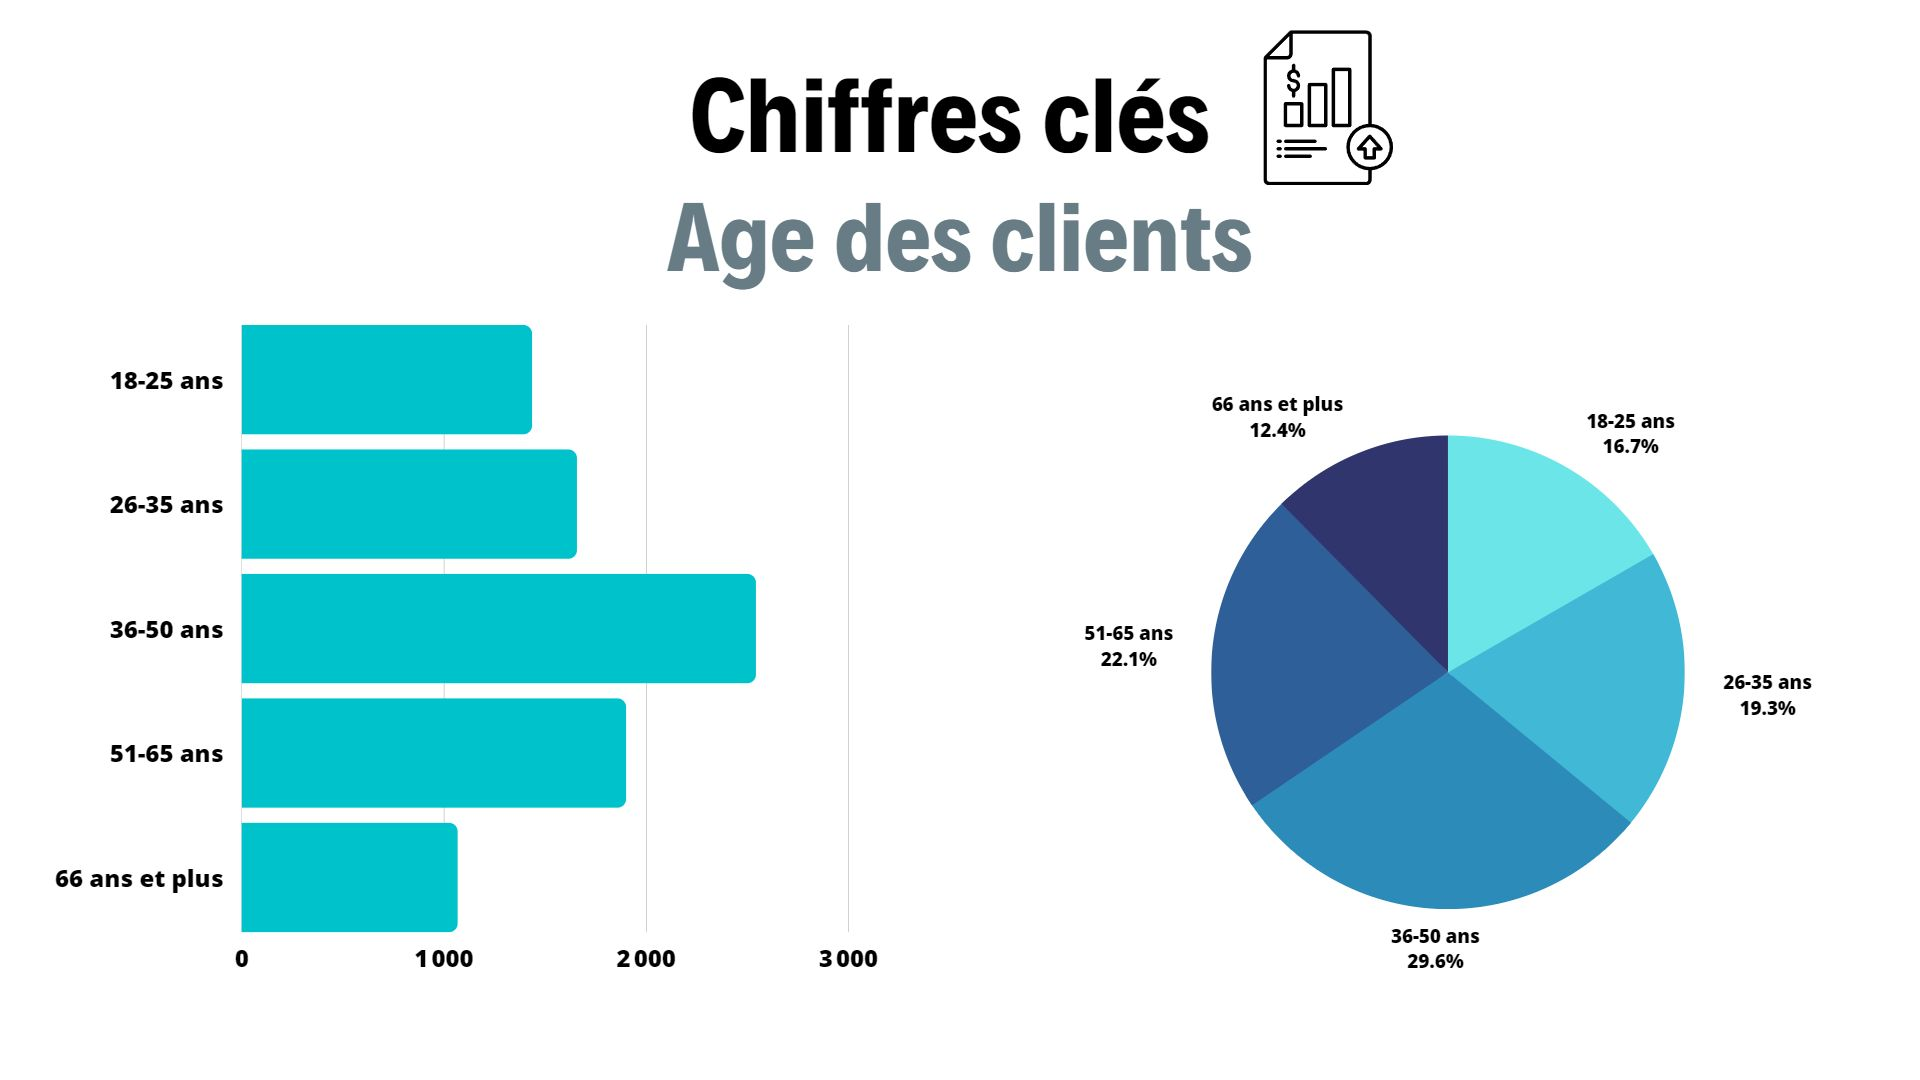

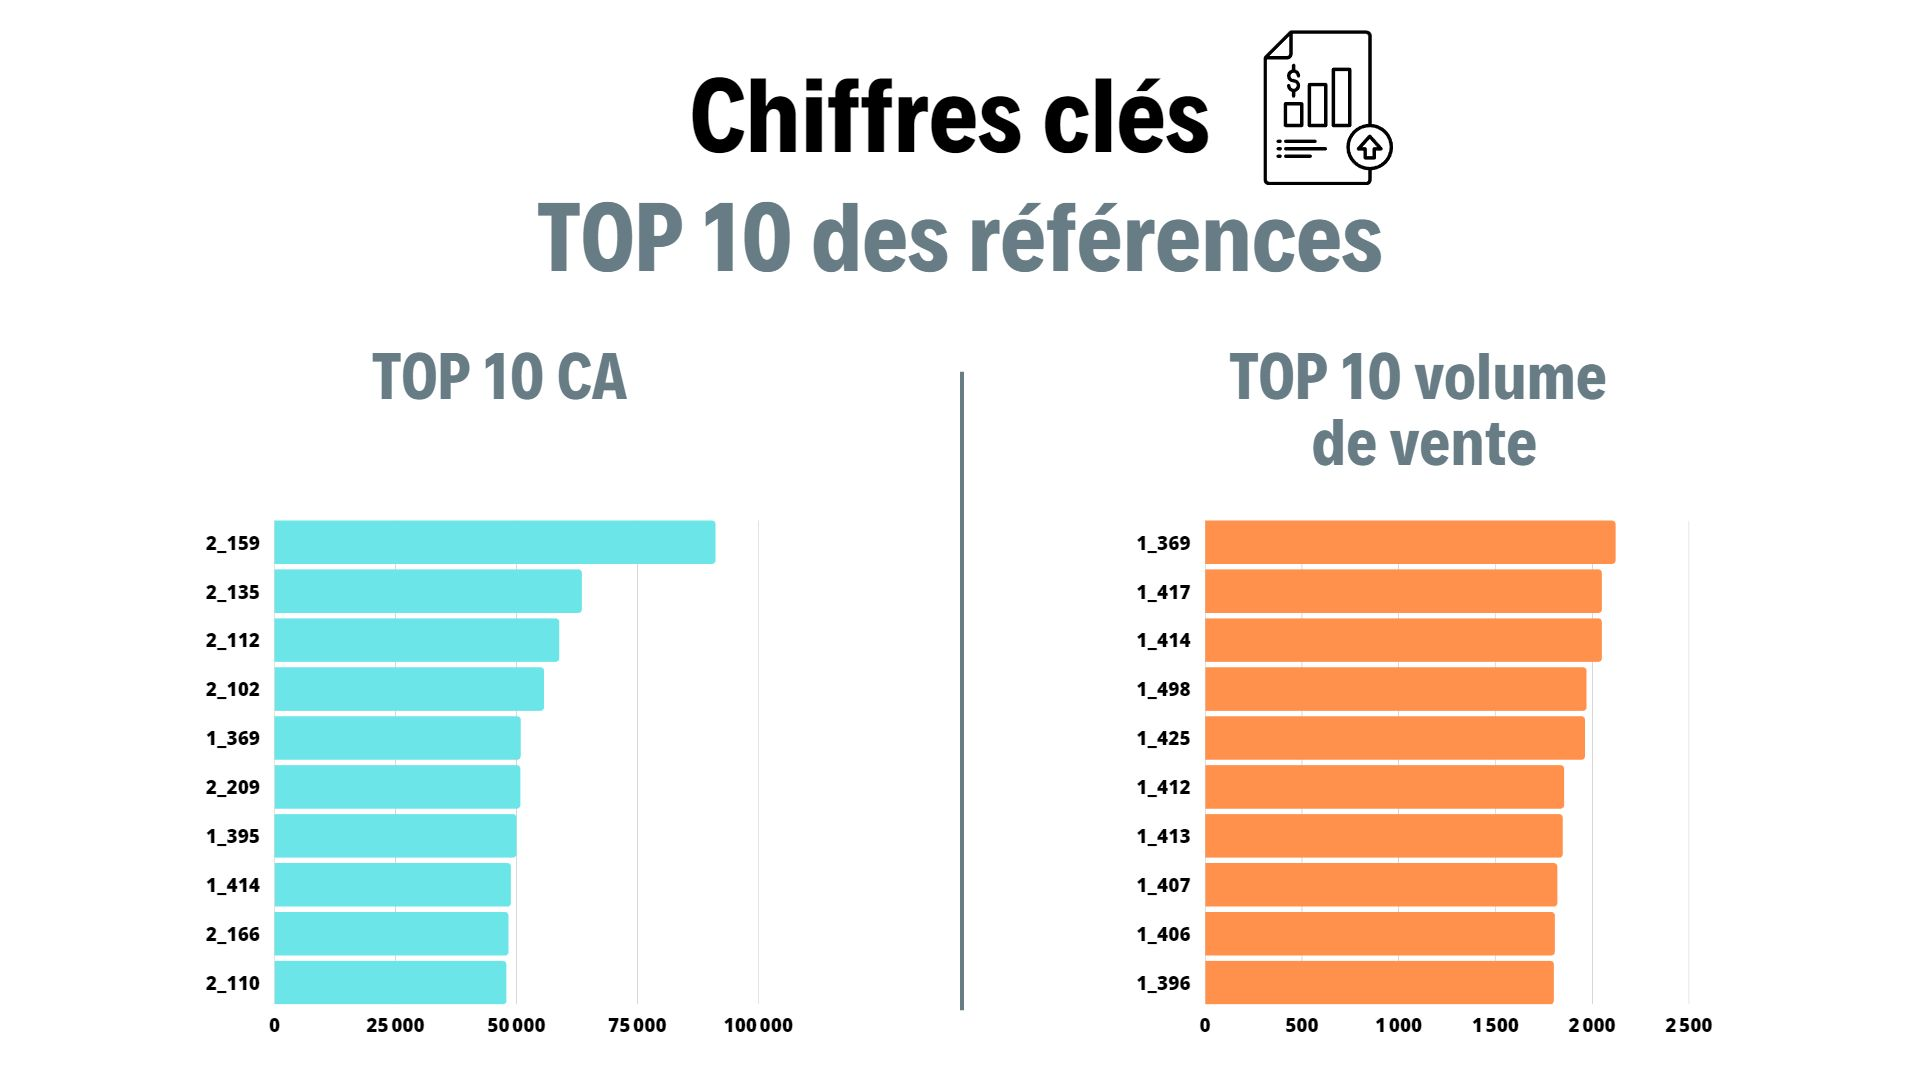

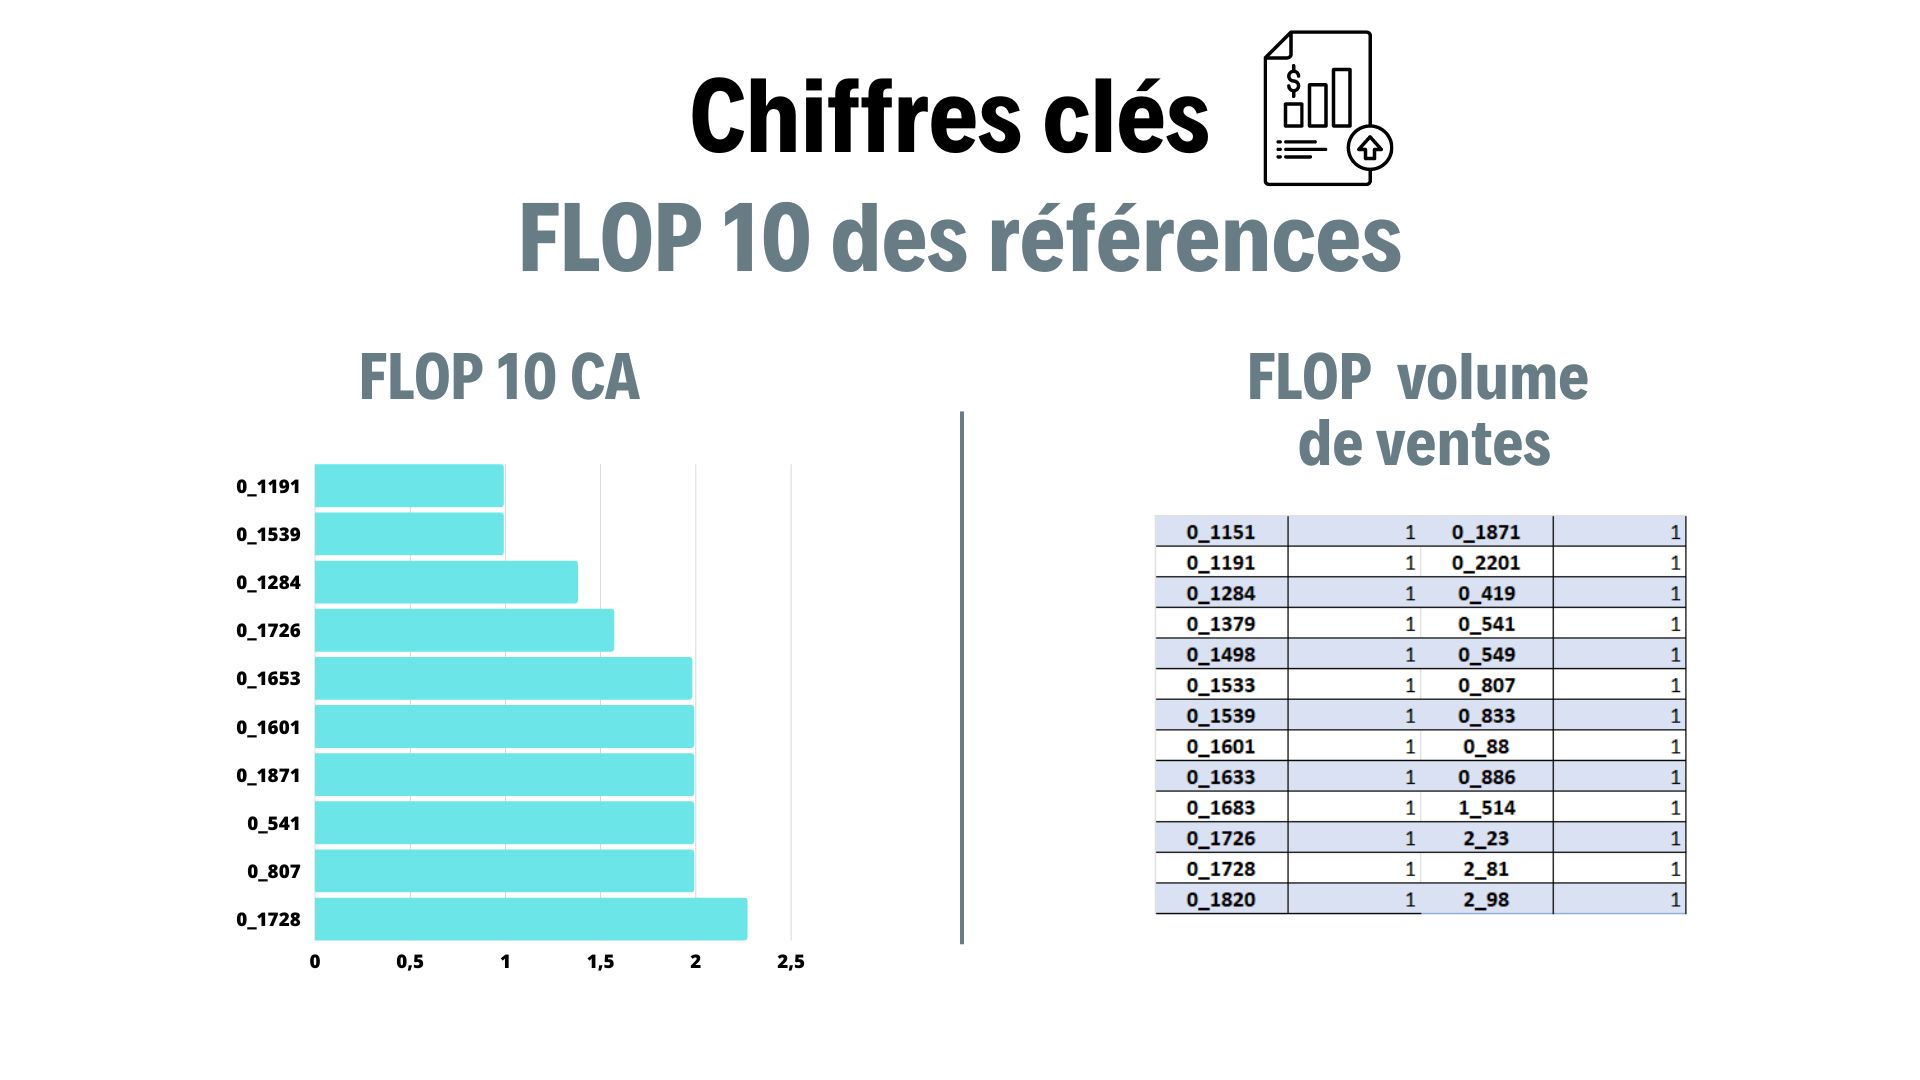

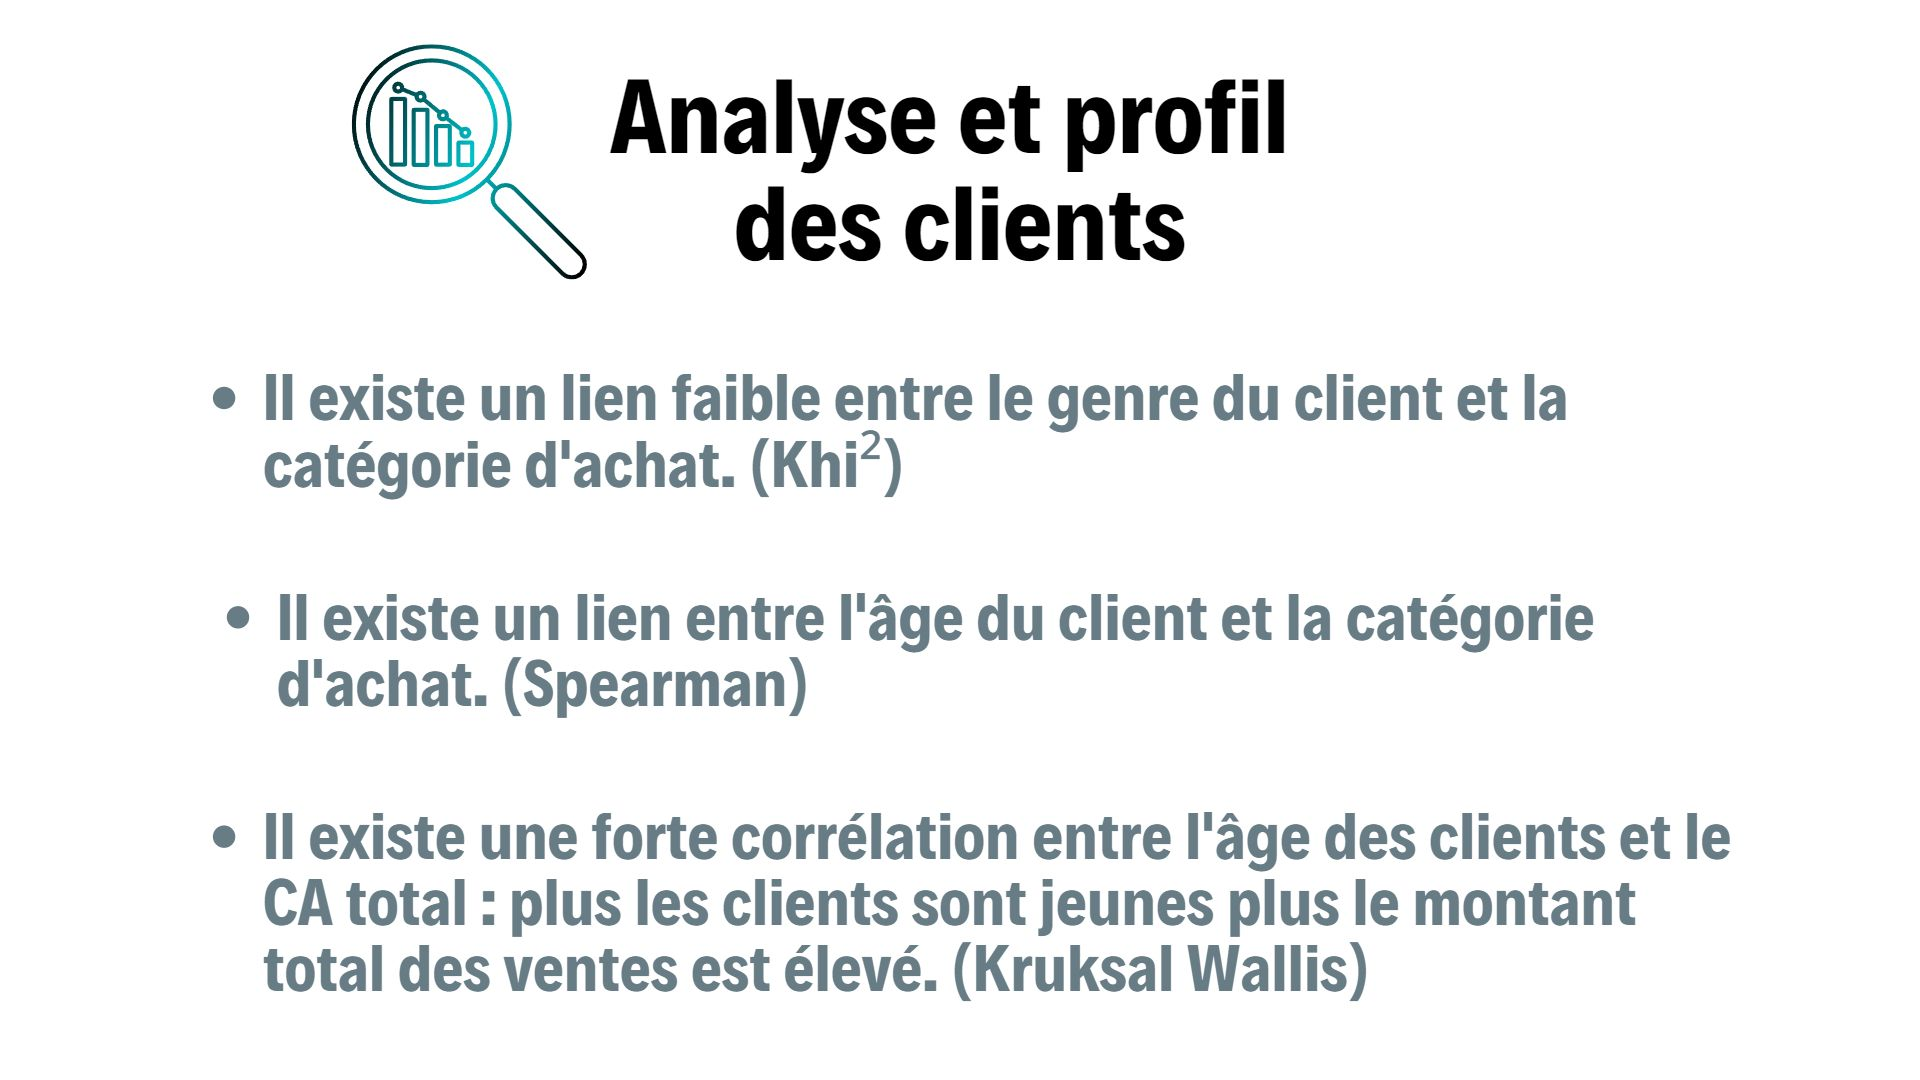

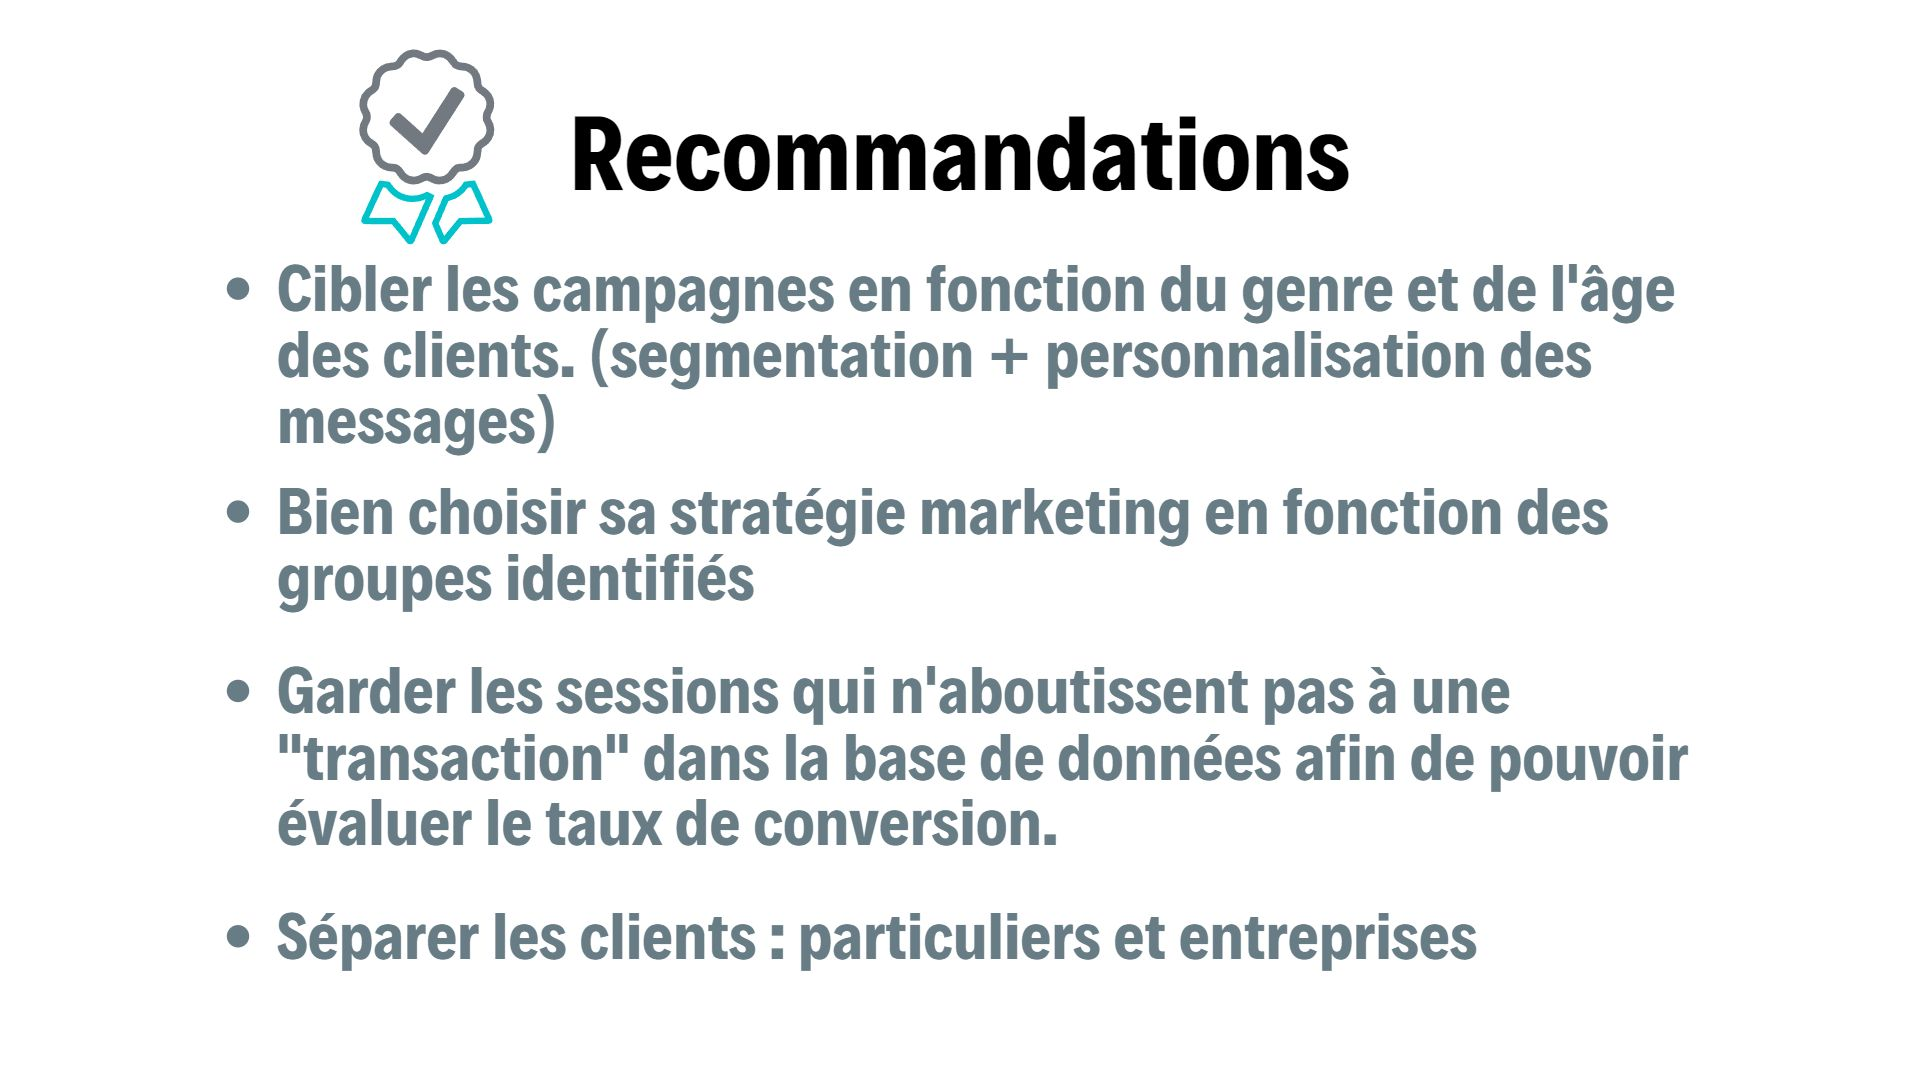

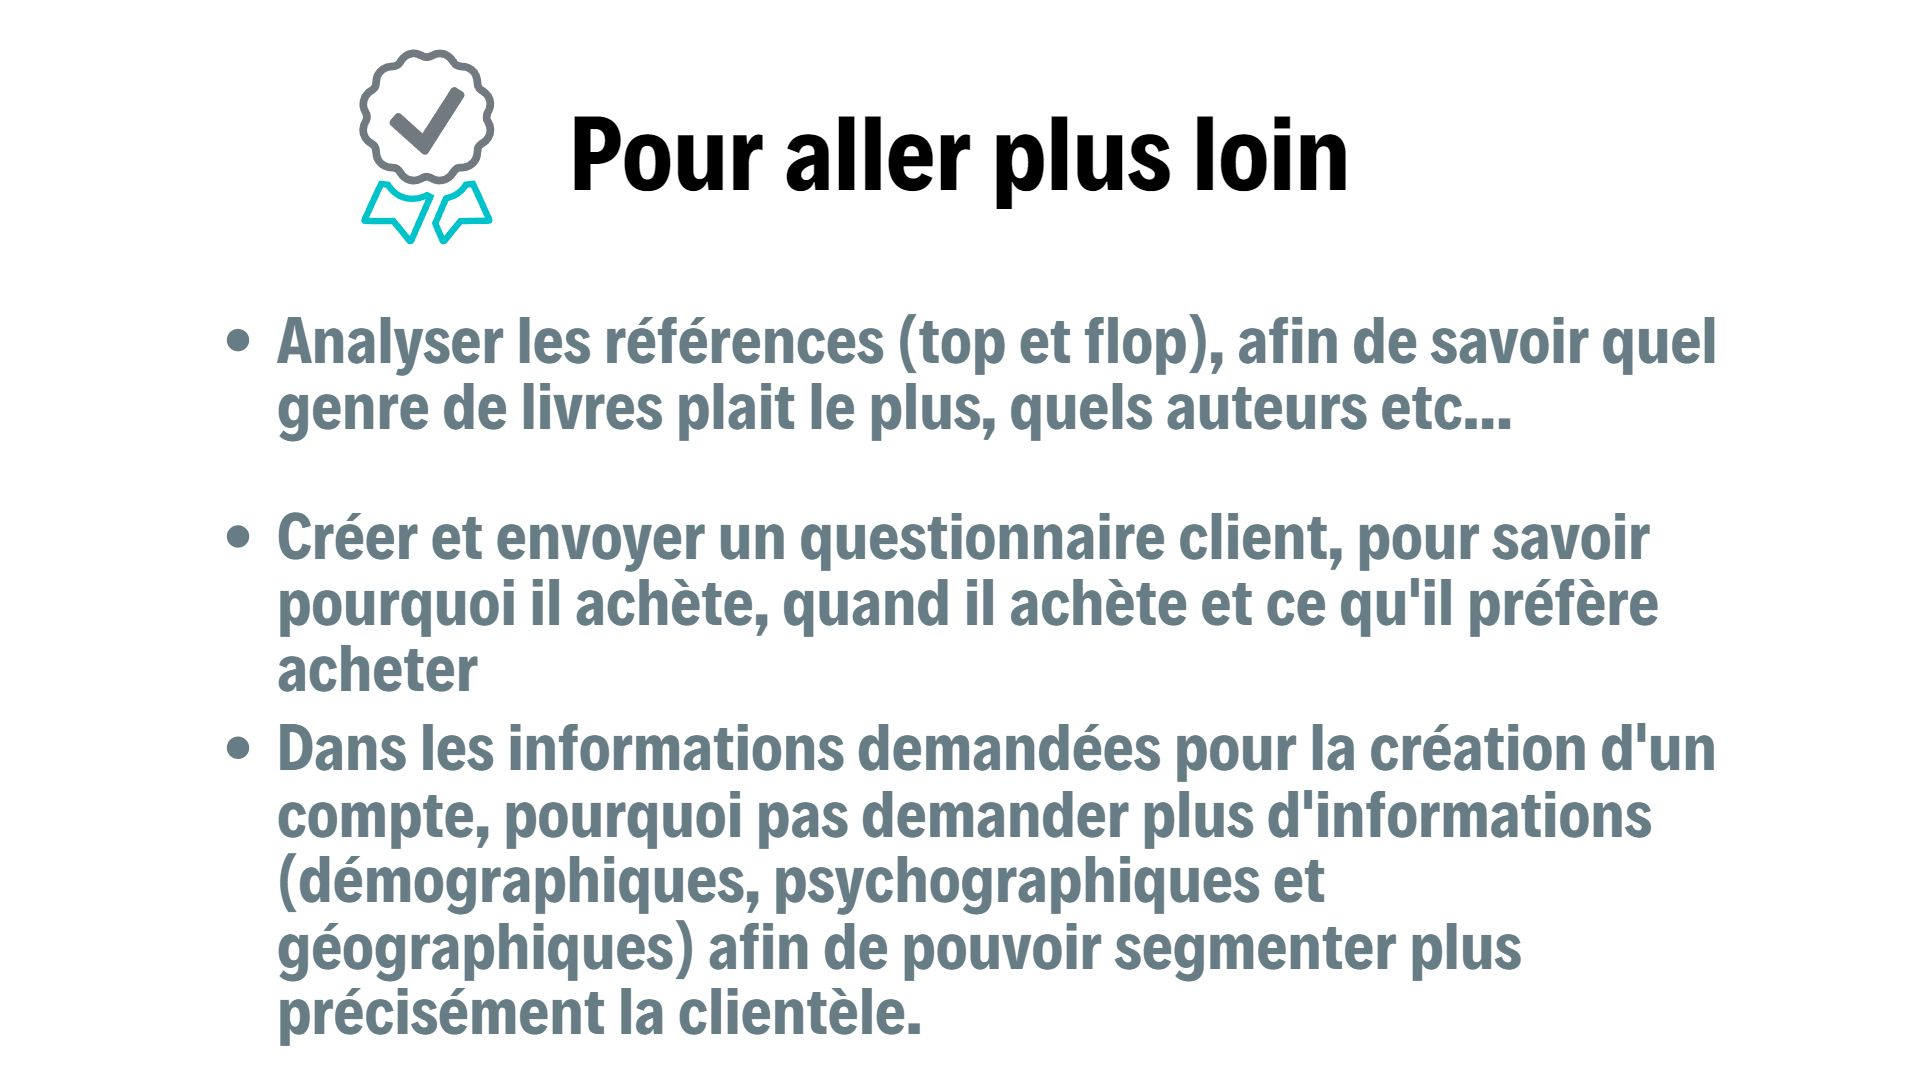

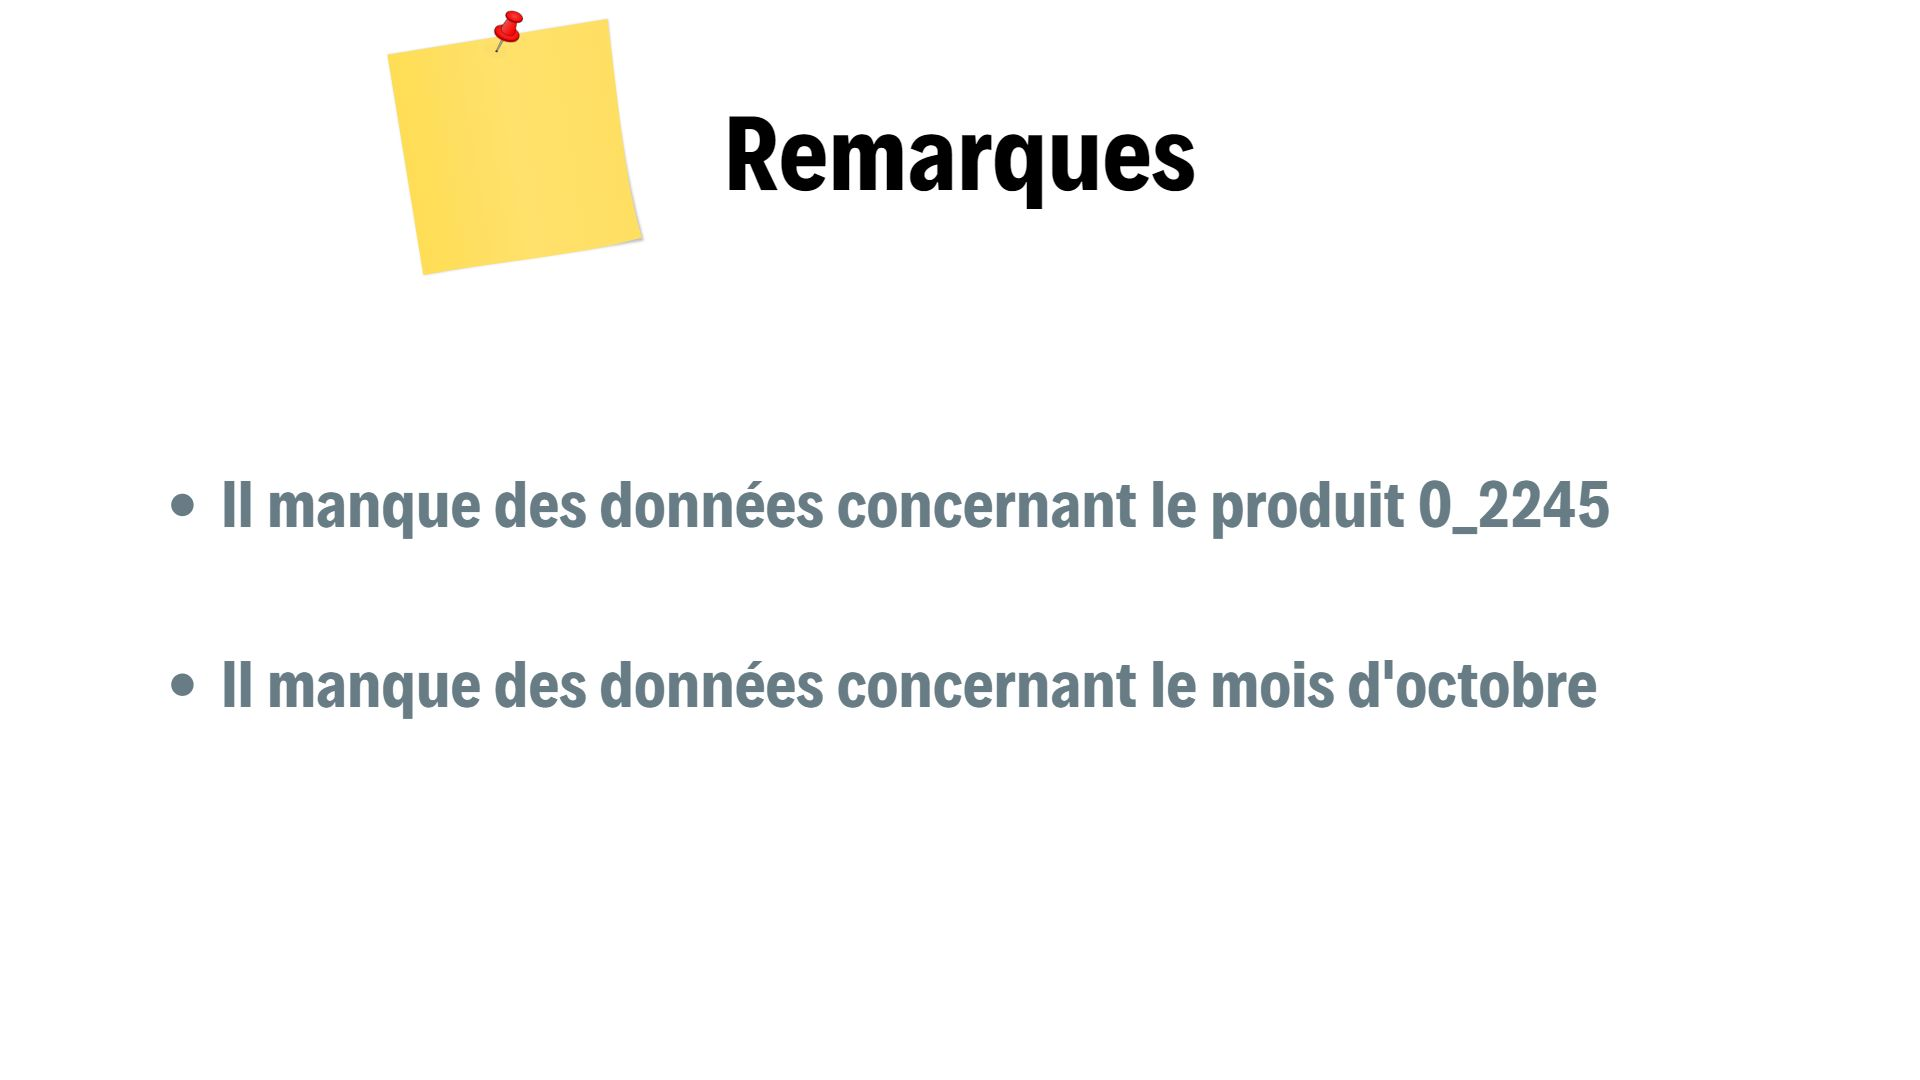